In [ ]:
!pip install PyDrive

In [1]:
import mykeys

mykeys.setOsEnv()

ÏïÑÎûò ÎßÅÌÅ¨Î•º Î≥µÏÇ¨ÌïòÏó¨ Ïõπ Î∏åÎùºÏö∞Ï†ÄÏóê Î∂ôÏó¨ÎÑ£ÏúºÏÑ∏Ïöî.
https://accounts.google.com/o/oauth2/auth?client_id=35726703810-4v13dfqmilhgv6shlc3cv9i3ktuh73j1.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code
Authentication successful.
mykey => set HUGGINGFACEHUB_API_TOKEN is done
mykey => set OPENAI_API_KEY is done
mykey => set LANGCHAIN_API_KEY is done
mykey => set LANGCHAIN_HUB_API_KEY is done
mykey => set GOOGLE_API_KEY is done
mykey => set UPSTAGE_API_KEY is done
mykey => set COHERE_API_KEY is done
mykey => set JINA_API_KEY is done
mykey => set ANTHROPIC_API_KEY is done
mykey => set DEEPL_API_KEY is done
mykey => set TAVILY_API_KEY is done
mykey => set TOGETHER_API_KEY is done


In [2]:
import os

project_name = 'CH17_LangGraph_SUB02'

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = project_name

In [3]:
from langchain_teddynote import logging

# ÌîÑÎ°úÏ†ùÌä∏ Ïù¥Î¶ÑÏùÑ ÏûÖÎ†•Ìï©ÎãàÎã§.
logging.langsmith(project_name)

LangSmith Ï∂îÏ†ÅÏùÑ ÏãúÏûëÌï©ÎãàÎã§.
[ÌîÑÎ°úÏ†ùÌä∏Î™Ö]
CH17_LangGraph_SUB02


In [ ]:
from langchain_teddynote import logging

# set_enable=False Î°ú ÏßÄÏ†ïÌïòÎ©¥ Ï∂îÏ†ÅÏùÑ ÌïòÏßÄ ÏïäÏäµÎãàÎã§.
logging.langsmith(project_name, set_enable=False)

CH17 LangGraph

01. Íµ¨Ï°∞ ÏÑ§Í≥Ñ

01. Í∏∞Î≥∏ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±

In [4]:
from typing import TypedDict, Annotated, List
from langchain_core.documents import Document
import operator


# State Ï†ïÏùò
class GraphState(TypedDict):
    context: Annotated[List[Document], operator.add]
    answer: Annotated[List[Document], operator.add]
    question: Annotated[str, operator.add]
    sql_query: Annotated[str, operator.add]
    binary_score: Annotated[str, operator.add]


In [5]:
def retrieve(state: GraphState) -> GraphState:
    # retrieve: Í≤ÄÏÉâ
    documents = "Í≤ÄÏÉâÎêú Î¨∏ÏÑú"
    return GraphState(context=documents)


def rewrite_query(state: GraphState) -> GraphState:
    # Query Transform: ÏøºÎ¶¨ Ïû¨ÏûëÏÑ±
    documents = "Í≤ÄÏÉâÎêú Î¨∏ÏÑú"
    return GraphState(context=documents)


def llm_gpt_execute(state: GraphState) -> GraphState:
    # LLM Ïã§Ìñâ
    answer = "GPT ÏÉùÏÑ±Îêú ÎãµÎ≥Ä"
    return GraphState(answer=answer)


def llm_claude_execute(state: GraphState) -> GraphState:
    # LLM Ïã§Ìñâ
    answer = "Claude Ïùò ÏÉùÏÑ±Îêú ÎãµÎ≥Ä"
    return GraphState(answer=answer)


def relevance_check(state: GraphState) -> GraphState:
    # Relevance Check: Í¥ÄÎ†®ÏÑ± ÌôïÏù∏
    binary_score = "Relevance Score"
    return GraphState(binary_score=binary_score)


def sum_up(state: GraphState) -> GraphState:
    # sum_up: Í≤∞Í≥º Ï¢ÖÌï©
    answer = "Ï¢ÖÌï©Îêú ÎãµÎ≥Ä"
    return GraphState(answer=answer)


def search_on_web(state: GraphState) -> GraphState:
    # Search on Web: Ïõπ Í≤ÄÏÉâ
    documents = state["context"] = "Í∏∞Ï°¥ Î¨∏ÏÑú"
    searched_documents = "Í≤ÄÏÉâÎêú Î¨∏ÏÑú"
    documents += searched_documents
    return GraphState(context=documents)


def get_table_info(state: GraphState) -> GraphState:
    # Get Table Info: ÌÖåÏù¥Î∏î Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
    table_info = "ÌÖåÏù¥Î∏î Ï†ïÎ≥¥"
    return GraphState(context=table_info)


def generate_sql_query(state: GraphState) -> GraphState:
    # Make SQL Query: SQL ÏøºÎ¶¨ ÏÉùÏÑ±
    sql_query = "SQL ÏøºÎ¶¨"
    return GraphState(sql_query=sql_query)


def execute_sql_query(state: GraphState) -> GraphState:
    # Execute SQL Query: SQL ÏøºÎ¶¨ Ïã§Ìñâ
    sql_result = "SQL Í≤∞Í≥º"
    return GraphState(context=sql_result)


def validate_sql_query(state: GraphState) -> GraphState:
    # Validate SQL Query: SQL ÏøºÎ¶¨ Í≤ÄÏ¶ù
    binary_score = "SQL ÏøºÎ¶¨ Í≤ÄÏ¶ù Í≤∞Í≥º"
    return GraphState(binary_score=binary_score)


def handle_error(state: GraphState) -> GraphState:
    # Error Handling: ÏóêÎü¨ Ï≤òÎ¶¨
    error = "ÏóêÎü¨ Î∞úÏÉù"
    return GraphState(context=error)


def decision(state: GraphState) -> GraphState:
    # ÏùòÏÇ¨Í≤∞Ï†ï
    decision = "Í≤∞Ï†ï"
    return decision


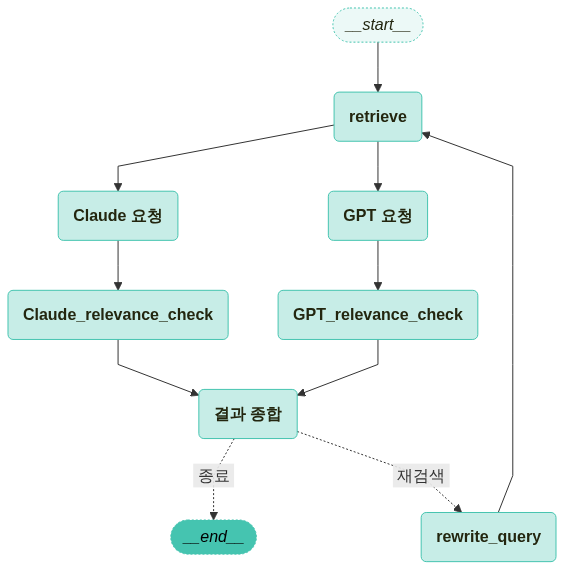

In [6]:
from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from langchain_teddynote.graphs import visualize_graph

# (1): Conventional RAG
# (2): Ïû¨Í≤ÄÏÉâ
# (3): Î©ÄÌã∞ LLM
# (4): ÏøºÎ¶¨ Ïû¨ÏûëÏÑ±


# langgraph.graphÏóêÏÑú StateGraphÏôÄ ENDÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
workflow = StateGraph(GraphState)

# ÎÖ∏ÎìúÎ•º Ï∂îÍ∞ÄÌï©ÎãàÎã§.
workflow.add_node("retrieve", retrieve)

workflow.add_node("rewrite_query", rewrite_query)  # (4)

workflow.add_node("GPT ÏöîÏ≤≠", llm_gpt_execute)
workflow.add_node("Claude ÏöîÏ≤≠", llm_claude_execute)  # (3)
workflow.add_node("GPT_relevance_check", relevance_check)
workflow.add_node("Claude_relevance_check", relevance_check)  # (3)
workflow.add_node("Í≤∞Í≥º Ï¢ÖÌï©", sum_up)

# Í∞Å ÎÖ∏ÎìúÎì§ÏùÑ Ïó∞Í≤∞Ìï©ÎãàÎã§.
workflow.add_edge("retrieve", "GPT ÏöîÏ≤≠")
workflow.add_edge("retrieve", "Claude ÏöîÏ≤≠")  # (3)
workflow.add_edge("rewrite_query", "retrieve")  # (4)
workflow.add_edge("GPT ÏöîÏ≤≠", "GPT_relevance_check")
workflow.add_edge("GPT_relevance_check", "Í≤∞Í≥º Ï¢ÖÌï©")
workflow.add_edge("Claude ÏöîÏ≤≠", "Claude_relevance_check")  # (3)
workflow.add_edge("Claude_relevance_check", "Í≤∞Í≥º Ï¢ÖÌï©")  # (3)

# workflow.add_edge("Í≤∞Í≥º Ï¢ÖÌï©", END)  # (2) - off

# Ï°∞Í±¥Î∂Ä Ïó£ÏßÄÎ•º Ï∂îÍ∞ÄÌï©ÎãàÎã§. (2), (4)
# workflow.add_conditional_edges(
#     "Í≤∞Í≥º Ï¢ÖÌï©",  # Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ ÎÖ∏ÎìúÏóêÏÑú ÎÇòÏò® Í≤∞Í≥ºÎ•º is_relevant Ìï®ÏàòÏóê Ï†ÑÎã¨Ìï©ÎãàÎã§.
#     decision,
#     {
#         "Ïû¨Í≤ÄÏÉâ": "retrieve",  # Í¥ÄÎ†®ÏÑ±Ïù¥ ÏûàÏúºÎ©¥ Ï¢ÖÎ£åÌï©ÎãàÎã§.
#         "Ï¢ÖÎ£å": END,  # Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ Í≤∞Í≥ºÍ∞Ä Î™®Ìò∏ÌïòÎã§Î©¥ Îã§Ïãú ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
#     },
# )

# Ï°∞Í±¥Î∂Ä Ïó£ÏßÄÎ•º Ï∂îÍ∞ÄÌï©ÎãàÎã§. (4)
workflow.add_conditional_edges(
    "Í≤∞Í≥º Ï¢ÖÌï©",  # Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ ÎÖ∏ÎìúÏóêÏÑú ÎÇòÏò® Í≤∞Í≥ºÎ•º is_relevant Ìï®ÏàòÏóê Ï†ÑÎã¨Ìï©ÎãàÎã§.
    decision,
    {
        "Ïû¨Í≤ÄÏÉâ": "rewrite_query",  # Í¥ÄÎ†®ÏÑ±Ïù¥ ÏûàÏúºÎ©¥ Ï¢ÖÎ£åÌï©ÎãàÎã§.
        "Ï¢ÖÎ£å": END,  # Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ Í≤∞Í≥ºÍ∞Ä Î™®Ìò∏ÌïòÎã§Î©¥ Îã§Ïãú ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
    },
)

# ÏãúÏûëÏ†êÏùÑ ÏÑ§Ï†ïÌï©ÎãàÎã§.
workflow.set_entry_point("retrieve")

# Í∏∞Î°ùÏùÑ ÏúÑÌïú Î©îÎ™®Î¶¨ Ï†ÄÏû•ÏÜåÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
memory = MemorySaver()

# Í∑∏ÎûòÌîÑÎ•º Ïª¥ÌååÏùºÌï©ÎãàÎã§.
app = workflow.compile(checkpointer=memory)

# Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
visualize_graph(app)


In [7]:
from IPython.display import Image, display
from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver

# langgraph.graphÏóêÏÑú StateGraphÏôÄ ENDÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
workflow = StateGraph(GraphState)

# ÎÖ∏ÎìúÎ•º Ï∂îÍ∞ÄÌï©ÎãàÎã§.
workflow.add_node("ÏßàÎ¨∏", retrieve)
workflow.add_node("rewrite_query", rewrite_query)
workflow.add_node("rewrite_question", rewrite_query)
workflow.add_node("GPT ÏöîÏ≤≠", llm_gpt_execute)
workflow.add_node("GPT_relevance_check", relevance_check)
workflow.add_node("Í≤∞Í≥º Ï¢ÖÌï©", sum_up)
workflow.add_node("get_table_info", get_table_info)
workflow.add_node("generate_sql_query", generate_sql_query)
workflow.add_node("execute_sql_query", execute_sql_query)
workflow.add_node("validate_sql_query", validate_sql_query)

# Í∞Å ÎÖ∏ÎìúÎì§ÏùÑ Ïó∞Í≤∞Ìï©ÎãàÎã§.
workflow.add_edge("ÏßàÎ¨∏", "get_table_info")
workflow.add_edge("get_table_info", "generate_sql_query")
workflow.add_edge("generate_sql_query", "execute_sql_query")
workflow.add_edge("execute_sql_query", "validate_sql_query")

workflow.add_conditional_edges(
    "validate_sql_query",
    decision,
    {
        "QUERY ERROR": "rewrite_query",
        "UNKNOWN MEANING": "rewrite_question",
        "PASS": "GPT ÏöîÏ≤≠",
    },
)

workflow.add_edge("rewrite_query", "execute_sql_query")
workflow.add_edge("rewrite_question", "rewrite_query")
workflow.add_edge("GPT ÏöîÏ≤≠", "GPT_relevance_check")
workflow.add_edge("GPT_relevance_check", "Í≤∞Í≥º Ï¢ÖÌï©")
workflow.add_edge("Í≤∞Í≥º Ï¢ÖÌï©", END)

# ÏãúÏûëÏ†êÏùÑ ÏÑ§Ï†ïÌï©ÎãàÎã§.
workflow.set_entry_point("ÏßàÎ¨∏")

# Í∏∞Î°ùÏùÑ ÏúÑÌïú Î©îÎ™®Î¶¨ Ï†ÄÏû•ÏÜåÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§.
memory = MemorySaver()

# Í∑∏ÎûòÌîÑÎ•º Ïª¥ÌååÏùºÌï©ÎãàÎã§.
app = workflow.compile(checkpointer=memory)


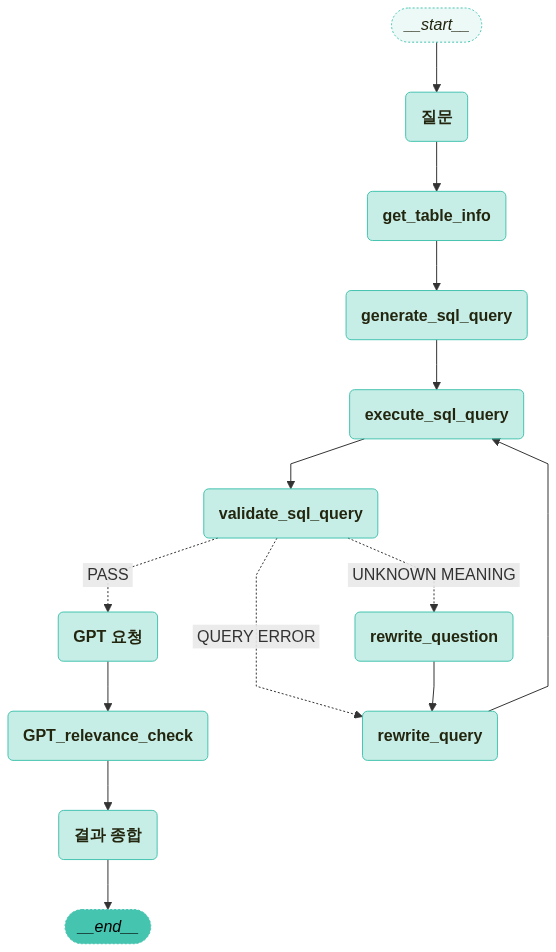

In [8]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(app)


02. Naive RAG

In [14]:
!pip install -q faiss-cpu

In [15]:
from rag.pdf import PDFRetrievalChain

# PDF Î¨∏ÏÑúÎ•º Î°úÎìúÌï©ÎãàÎã§.
pdf = PDFRetrievalChain(["data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf"]).create_chain()

# retrieverÏôÄ chainÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
pdf_retriever = pdf.retriever
pdf_chain = pdf.chain


In [16]:
search_result = pdf_retriever.invoke("Ïï§Ïä§Î°úÌîΩÏóê Ìà¨ÏûêÌïú Í∏∞ÏóÖÍ≥º Ìà¨ÏûêÍ∏àÏï°ÏùÑ ÏïåÎ†§Ï£ºÏÑ∏Ïöî.")
search_result


[Document(id='97c8bdbc-1b33-4a96-9f48-7fe9e612160a', metadata={'source': 'data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf', 'file_path': 'data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf', 'page': 13, 'total_pages': 23, 'Author': 'dj', 'Creator': 'Hwp 2018 10.0.0.13462', 'Producer': 'Hancom PDF 1.3.0.542', 'CreationDate': "D:20231208132838+09'00'", 'ModDate': "D:20231208132838+09'00'", 'PDFVersion': '1.4'}, page_content='1. Ï†ïÏ±Ö/Î≤ïÏ†ú 2. Í∏∞ÏóÖ/ÏÇ∞ÏóÖ 3. Í∏∞Ïà†/Ïó∞Íµ¨ 4. Ïù∏Î†•/ÍµêÏú°\nÍµ¨Í∏Ä, Ïï§Ïä§Î°úÌîΩÏóê 20Ïñµ Îã¨Îü¨ Ìà¨ÏûêÎ°ú ÏÉùÏÑ± AI ÌòëÎ†• Í∞ïÌôî\nKEY Contents\nn Íµ¨Í∏ÄÏù¥ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 20Ïñµ Îã¨Îü¨ Ìà¨ÏûêÏóê Ìï©ÏùòÌïòÍ≥† 5Ïñµ Îã¨Îü¨Î•º Ïö∞ÏÑ† Ìà¨ÏûêÌñàÏúºÎ©∞, Ïï§Ïä§Î°úÌîΩÏùÄ\nÍµ¨Í∏ÄÍ≥º ÌÅ¥ÎùºÏö∞Îìú ÏÑúÎπÑÏä§ ÏÇ¨Ïö© Í≥ÑÏïΩÎèÑ Ï≤¥Í≤∞\nn 3ÎåÄ ÌÅ¥ÎùºÏö∞Îìú ÏÇ¨ÏóÖÏûêÏù∏ Íµ¨Í∏Ä, ÎßàÏù¥ÌÅ¨Î°úÏÜåÌîÑÌä∏, ÏïÑÎßàÏ°¥ÏùÄ Ï∞®ÏÑ∏ÎåÄ AI Î™®Îç∏Ïùò ÎåÄÌëú Í∏∞ÏóÖÏù∏\nÏï§Ïä§Î°úÌîΩ Î∞è Ïò§ÌîàAIÏôÄ ÌòëÎ†•ÏùÑ ÌôïÎåÄÌïòÎäî Ï∂îÏÑ∏\n¬£Íµ¨Í∏Ä, Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 20Ïñµ Îã¨Îü¨ Ìà¨Ïûê Ìï©Ïùò Î∞è ÌÅ¥ÎùºÏö

In [17]:
# Í≤ÄÏÉâ Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
answer = pdf_chain.invoke(
    {
        "question": "Ïï§Ïä§Î°úÌîΩÏóê Ìà¨ÏûêÌïú Í∏∞ÏóÖÍ≥º Ìà¨ÏûêÍ∏àÏï°ÏùÑ ÏïåÎ†§Ï£ºÏÑ∏Ïöî.",
        "context": search_result,
        "chat_history": [],
    }
)
print(answer)


Íµ¨Í∏ÄÏùÄ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 20Ïñµ Îã¨Îü¨Î•º Ìà¨ÏûêÌïòÍ∏∞Î°ú Ìï©ÏùòÌïòÏòÄÏúºÎ©∞, Ïù¥ Ï§ë 5Ïñµ Îã¨Îü¨Î•º Ïö∞ÏÑ† Ìà¨ÏûêÌñàÏäµÎãàÎã§. ÎòêÌïú, ÏïÑÎßàÏ°¥ÏùÄ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 40Ïñµ Îã¨Îü¨Ïùò Ìà¨Ïûê Í≥ÑÌöçÏùÑ Í≥µÍ∞úÌñàÏäµÎãàÎã§.

**Source**
- data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf (page 13)


In [18]:
# Í≤ÄÏÉâ Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
answer = pdf_chain.invoke(
    {
        "question": "Ïï§Ïä§Î°úÌîΩÏóê Ìà¨ÏûêÌïú Í∏∞ÏóÖÍ≥º Ìà¨ÏûêÍ∏àÏï°ÏùÑ ÏïåÎ†§Ï£ºÏÑ∏Ïöî.",
        "context": search_result,
        "chat_history": [],
    }
)
print(answer)


Íµ¨Í∏ÄÏùÄ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 20Ïñµ Îã¨Îü¨Î•º Ìà¨ÏûêÌïòÍ∏∞Î°ú Ìï©ÏùòÌïòÏòÄÏúºÎ©∞, Ïù¥ Ï§ë 5Ïñµ Îã¨Îü¨Î•º Ïö∞ÏÑ† Ìà¨ÏûêÌñàÏäµÎãàÎã§. ÎòêÌïú, Íµ¨Í∏ÄÏùÄ 2023ÎÖÑ 2ÏõîÏóê Ïù¥ÎØ∏ 5Ïñµ 5,000Îßå Îã¨Îü¨Î•º Ïï§Ïä§Î°úÌîΩÏóê Ìà¨ÏûêÌïú Î∞î ÏûàÏäµÎãàÎã§. ÏïÑÎßàÏ°¥ÏùÄ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 40Ïñµ Îã¨Îü¨Ïùò Ìà¨Ïûê Í≥ÑÌöçÏùÑ Î∞úÌëúÌñàÏäµÎãàÎã§.

**Source**
- data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf (page 13)


In [19]:
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages


# GraphState ÏÉÅÌÉú Ï†ïÏùò
class GraphState(TypedDict):
    question: Annotated[str, "Question"]  # ÏßàÎ¨∏
    context: Annotated[str, "Context"]  # Î¨∏ÏÑúÏùò Í≤ÄÏÉâ Í≤∞Í≥º
    answer: Annotated[str, "Answer"]  # ÎãµÎ≥Ä
    messages: Annotated[list, add_messages]  # Î©îÏãúÏßÄ(ÎàÑÏ†ÅÎêòÎäî list)


In [20]:
from langchain_teddynote.messages import messages_to_history
from rag.utils import format_docs


# Î¨∏ÏÑú Í≤ÄÏÉâ ÎÖ∏Îìú
def retrieve_document(state: GraphState) -> GraphState:
    # ÏßàÎ¨∏ÏùÑ ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.
    latest_question = state["question"]

    # Î¨∏ÏÑúÏóêÏÑú Í≤ÄÏÉâÌïòÏó¨ Í¥ÄÎ†®ÏÑ± ÏûàÎäî Î¨∏ÏÑúÎ•º Ï∞æÏäµÎãàÎã§.
    retrieved_docs = pdf_retriever.invoke(latest_question)

    # Í≤ÄÏÉâÎêú Î¨∏ÏÑúÎ•º ÌòïÏãùÌôîÌï©ÎãàÎã§.(ÌîÑÎ°¨ÌîÑÌä∏ ÏûÖÎ†•ÏúºÎ°ú ÎÑ£Ïñ¥Ï£ºÍ∏∞ ÏúÑÌï®)
    retrieved_docs = format_docs(retrieved_docs)

    # Í≤ÄÏÉâÎêú Î¨∏ÏÑúÎ•º context ÌÇ§Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.
    return GraphState(context=retrieved_docs)


# ÎãµÎ≥Ä ÏÉùÏÑ± ÎÖ∏Îìú
def llm_answer(state: GraphState) -> GraphState:
    # ÏßàÎ¨∏ÏùÑ ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.
    latest_question = state["question"]

    # Í≤ÄÏÉâÎêú Î¨∏ÏÑúÎ•º ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.
    context = state["context"]

    # Ï≤¥Ïù∏ÏùÑ Ìò∏Ï∂úÌïòÏó¨ ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
    response = pdf_chain.invoke(
        {
            "question": latest_question,
            "context": context,
            "chat_history": messages_to_history(state["messages"]),
        }
    )
    # ÏÉùÏÑ±Îêú ÎãµÎ≥Ä, (Ïú†Ï†ÄÏùò ÏßàÎ¨∏, ÎãµÎ≥Ä) Î©îÏãúÏßÄÎ•º ÏÉÅÌÉúÏóê Ï†ÄÏû•Ìï©ÎãàÎã§.
    return GraphState(
        answer=response, messages=[("user", latest_question), ("assistant", response)]
    )


In [21]:
from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
workflow = StateGraph(GraphState)

# ÎÖ∏Îìú Ï†ïÏùò
workflow.add_node("retrieve", retrieve_document)
workflow.add_node("llm_answer", llm_answer)

# Ïó£ÏßÄ Ï†ïÏùò
workflow.add_edge("retrieve", "llm_answer")  # Í≤ÄÏÉâ -> ÎãµÎ≥Ä
workflow.add_edge("llm_answer", END)  # ÎãµÎ≥Ä -> Ï¢ÖÎ£å

# Í∑∏ÎûòÌîÑ ÏßÑÏûÖÏ†ê ÏÑ§Ï†ï
workflow.set_entry_point("retrieve")

# Ï≤¥ÌÅ¨Ìè¨Ïù∏ÌÑ∞ ÏÑ§Ï†ï
memory = MemorySaver()

# Ïª¥ÌååÏùº
app = workflow.compile(checkpointer=memory)


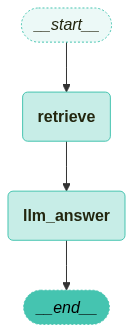

In [22]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(app)


In [23]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import stream_graph, random_uuid

# config ÏÑ§Ï†ï(Ïû¨Í∑Ä ÏµúÎåÄ ÌöüÏàò, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})

# ÏßàÎ¨∏ ÏûÖÎ†•
inputs = GraphState(question="Ïï§Ïä§Î°úÌîΩÏóê Ìà¨ÏûêÌïú Í∏∞ÏóÖÍ≥º Ìà¨ÏûêÍ∏àÏï°ÏùÑ ÏïåÎ†§Ï£ºÏÑ∏Ïöî.")

# Í∑∏ÎûòÌîÑ Ïã§Ìñâ
stream_graph(app, inputs, config, ["llm_answer"])



üîÑ Node: llm_answer üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
Íµ¨Í∏ÄÏùÄ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 20Ïñµ Îã¨Îü¨Î•º Ìà¨ÏûêÌïòÍ∏∞Î°ú Ìï©ÏùòÌïòÏòÄÏúºÎ©∞, Ïù¥ Ï§ë 5Ïñµ Îã¨Îü¨Î•º Ïö∞ÏÑ† Ìà¨ÏûêÌñàÏäµÎãàÎã§. ÏïÑÎßàÏ°¥ÏùÄ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 40Ïñµ Îã¨Îü¨Ïùò Ìà¨Ïûê Í≥ÑÌöçÏùÑ Î∞úÌëúÌñàÏäµÎãàÎã§.

**Source**
- data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf (page 14)

In [24]:
outputs = app.get_state(config).values

print(f'Question: {outputs["question"]}')
print("===" * 20)
print(f'Answer:\n{outputs["answer"]}')


Question: Ïï§Ïä§Î°úÌîΩÏóê Ìà¨ÏûêÌïú Í∏∞ÏóÖÍ≥º Ìà¨ÏûêÍ∏àÏï°ÏùÑ ÏïåÎ†§Ï£ºÏÑ∏Ïöî.
Answer:
Íµ¨Í∏ÄÏùÄ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 20Ïñµ Îã¨Îü¨Î•º Ìà¨ÏûêÌïòÍ∏∞Î°ú Ìï©ÏùòÌïòÏòÄÏúºÎ©∞, Ïù¥ Ï§ë 5Ïñµ Îã¨Îü¨Î•º Ïö∞ÏÑ† Ìà¨ÏûêÌñàÏäµÎãàÎã§. ÏïÑÎßàÏ°¥ÏùÄ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 40Ïñµ Îã¨Îü¨Ïùò Ìà¨Ïûê Í≥ÑÌöçÏùÑ Î∞úÌëúÌñàÏäµÎãàÎã§.

**Source**
- data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf (page 14)


03. Í¥ÄÎ†®ÏÑ± Ï≤¥Ïª§(Relevance Checker) Î™®Îìà Ï∂îÍ∞Ä

In [25]:
from rag.pdf import PDFRetrievalChain  

# PDF Î¨∏ÏÑúÎ•º Î°úÎìúÌï©ÎãàÎã§.  
pdf = PDFRetrievalChain(["data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf"]).create_chain()  

# retrieverÏôÄ chainÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.  
pdf_retriever = pdf.retriever  
pdf_chain = pdf.chain  


In [26]:
from typing import Annotated, TypedDict  
from langgraph.graph.message import add_messages  


# GraphState ÏÉÅÌÉú Ï†ïÏùò  
class GraphState(TypedDict):  
    question: Annotated[str, "Question"]  # ÏßàÎ¨∏  
    context: Annotated[str, "Context"]  # Î¨∏ÏÑúÏùò Í≤ÄÏÉâ Í≤∞Í≥º  
    answer: Annotated[str, "Answer"]  # ÎãµÎ≥Ä  
    messages: Annotated[list, add_messages]  # Î©îÏãúÏßÄ(ÎàÑÏ†ÅÎêòÎäî list)  
    relevance: Annotated[str, "Relevance"]  # Í¥ÄÎ†®ÏÑ±  


In [27]:
from langchain_openai import ChatOpenAI  
from langchain_teddynote.evaluator import GroundednessChecker  
from langchain_teddynote.messages import messages_to_history  
from rag.utils import format_docs  


# Î¨∏ÏÑú Í≤ÄÏÉâ ÎÖ∏Îìú  
def retrieve_document(state: GraphState) -> GraphState:  
    # ÏßàÎ¨∏ÏùÑ ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.  
    latest_question = state["question"]  

    # Î¨∏ÏÑúÏóêÏÑú Í≤ÄÏÉâÌïòÏó¨ Í¥ÄÎ†®ÏÑ± ÏûàÎäî Î¨∏ÏÑúÎ•º Ï∞æÏäµÎãàÎã§.  
    retrieved_docs = pdf_retriever.invoke(latest_question)  

    # Í≤ÄÏÉâÎêú Î¨∏ÏÑúÎ•º ÌòïÏãùÌôîÌï©ÎãàÎã§.(ÌîÑÎ°¨ÌîÑÌä∏ ÏûÖÎ†•ÏúºÎ°ú ÎÑ£Ïñ¥Ï£ºÍ∏∞ ÏúÑÌï®)  
    retrieved_docs = format_docs(retrieved_docs)  

    # Í≤ÄÏÉâÎêú Î¨∏ÏÑúÎ•º context ÌÇ§Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.  
    return GraphState(context=retrieved_docs)  


# ÎãµÎ≥Ä ÏÉùÏÑ± ÎÖ∏Îìú  
def llm_answer(state: GraphState) -> GraphState:  
    # ÏßàÎ¨∏ÏùÑ ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.  
    latest_question = state["question"]  

    # Í≤ÄÏÉâÎêú Î¨∏ÏÑúÎ•º ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.  
    context = state["context"]  

    # Ï≤¥Ïù∏ÏùÑ Ìò∏Ï∂úÌïòÏó¨ ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.  
    response = pdf_chain.invoke(  
        {  
            "question": latest_question,  
            "context": context,  
            "chat_history": messages_to_history(state["messages"]),  
        }  
    )  

    # ÏÉùÏÑ±Îêú ÎãµÎ≥Ä, (Ïú†Ï†ÄÏùò ÏßàÎ¨∏, ÎãµÎ≥Ä) Î©îÏãúÏßÄÎ•º ÏÉÅÌÉúÏóê Ï†ÄÏû•Ìï©ÎãàÎã§.  
    return GraphState(  
        answer=response, messages=[("user", latest_question), ("assistant", response)]  
    )  


# Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ ÎÖ∏Îìú  
def relevance_check(state: GraphState) -> GraphState:  
    # Í¥ÄÎ†®ÏÑ± ÌèâÍ∞ÄÍ∏∞Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.  
    question_answer_relevant = GroundednessChecker(  
        llm=ChatOpenAI(model="gpt-4o-mini", temperature=0), target="question-retrieval"  
    ).create()  

    # Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨Î•º Ïã§Ìñâ("yes" or "no")  
    response = question_answer_relevant.invoke(  
        {"question": state["question"], "context": state["context"]}  
    )  

    print("==== [RELEVANCE CHECK] ====")  
    print(response.score)  

    # Ï∞∏Í≥†: Ïó¨Í∏∞ÏÑúÏùò Í¥ÄÎ†®ÏÑ± ÌèâÍ∞ÄÍ∏∞Îäî Í∞ÅÏûêÏùò Prompt Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏàòÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§. Ïó¨Îü¨Î∂ÑÎì§Ïùò Groundedness Check Î•º ÎßåÎì§Ïñ¥ ÏÇ¨Ïö©Ìï¥ Î≥¥ÏÑ∏Ïöî!  
    return GraphState(relevance=response.score)  


# Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ÌïòÎäî Ìï®Ïàò(router)  
def is_relevant(state: GraphState) -> GraphState:  
    return state["relevance"]  


In [28]:
from langgraph.graph import END, StateGraph  
from langgraph.checkpoint.memory import MemorySaver  

# Í∑∏ÎûòÌîÑ Ï†ïÏùò  
workflow = StateGraph(GraphState)  

# ÎÖ∏Îìú Ï∂îÍ∞Ä  
workflow.add_node("retrieve", retrieve_document)  
# Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ ÎÖ∏Îìú Ï∂îÍ∞Ä  
workflow.add_node("relevance_check", relevance_check)  
workflow.add_node("llm_answer", llm_answer)  

# Ïó£ÏßÄ Ï∂îÍ∞Ä  
workflow.add_edge("retrieve", "relevance_check")  # Í≤ÄÏÉâ -> Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨  


# # Ï°∞Í±¥Î∂Ä Ïó£ÏßÄÎ•º Ï∂îÍ∞ÄÌï©ÎãàÎã§.  
workflow.add_conditional_edges(  
    "relevance_check",  # Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ ÎÖ∏ÎìúÏóêÏÑú ÎÇòÏò® Í≤∞Í≥ºÎ•º is_relevant Ìï®ÏàòÏóê Ï†ÑÎã¨Ìï©ÎãàÎã§.  
    is_relevant,  
    {  
        "yes": "llm_answer",  # Í¥ÄÎ†®ÏÑ±Ïù¥ ÏûàÏúºÎ©¥ ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.  
        "no": "retrieve",  # Í¥ÄÎ†®ÏÑ±Ïù¥ ÏóÜÏúºÎ©¥ Îã§Ïãú Í≤ÄÏÉâÌï©ÎãàÎã§.  
    },  
)  

# Í∑∏ÎûòÌîÑ ÏßÑÏûÖÏ†ê ÏÑ§Ï†ï  
workflow.set_entry_point("retrieve")  

# Ï≤¥ÌÅ¨Ìè¨Ïù∏ÌÑ∞ ÏÑ§Ï†ï  
memory = MemorySaver()  

# Í∑∏ÎûòÌîÑ Ïª¥ÌååÏùº  
app = workflow.compile(checkpointer=memory)  


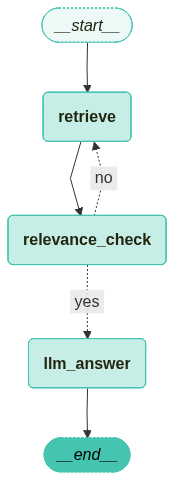

In [29]:
from langchain_teddynote.graphs import visualize_graph  

visualize_graph(app)  


In [30]:
from langchain_core.runnables import RunnableConfig  
from langchain_teddynote.messages import stream_graph, random_uuid  

# config ÏÑ§Ï†ï(Ïû¨Í∑Ä ÏµúÎåÄ ÌöüÏàò, thread_id)  
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})  

# ÏßàÎ¨∏ ÏûÖÎ†•  
inputs = GraphState(question="Ïï§Ïä§Î°úÌîΩÏóê Ìà¨ÏûêÌïú Í∏∞ÏóÖÍ≥º Ìà¨ÏûêÍ∏àÏï°ÏùÑ ÏïåÎ†§Ï£ºÏÑ∏Ïöî.")  

# Í∑∏ÎûòÌîÑ Ïã§Ìñâ  
stream_graph(app, inputs, config, ["relevance_check", "llm_answer"])  



üîÑ Node: relevance_check üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"score":"yes==== [RELEVANCE CHECK] ====
yes
"}
üîÑ Node: llm_answer üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
Íµ¨Í∏ÄÏùÄ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 20Ïñµ Îã¨Îü¨Î•º Ìà¨ÏûêÌïòÍ∏∞Î°ú Ìï©ÏùòÌïòÏòÄÏúºÎ©∞, Ïù¥ Ï§ë 5Ïñµ Îã¨Îü¨Î•º Ïö∞ÏÑ† Ìà¨ÏûêÌñàÏäµÎãàÎã§. ÏïÑÎßàÏ°¥ÏùÄ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 40Ïñµ Îã¨Îü¨Ïùò Ìà¨Ïûê Í≥ÑÌöçÏùÑ Î∞úÌëúÌñàÏäµÎãàÎã§.

**Source**
- data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf (page 14)

In [31]:
outputs = app.get_state(config).values  

print(f'Question: {outputs["question"]}')  
print("===" * 20)  
print(f'Answer:\n{outputs["answer"]}')  


Question: Ïï§Ïä§Î°úÌîΩÏóê Ìà¨ÏûêÌïú Í∏∞ÏóÖÍ≥º Ìà¨ÏûêÍ∏àÏï°ÏùÑ ÏïåÎ†§Ï£ºÏÑ∏Ïöî.
Answer:
Íµ¨Í∏ÄÏùÄ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 20Ïñµ Îã¨Îü¨Î•º Ìà¨ÏûêÌïòÍ∏∞Î°ú Ìï©ÏùòÌïòÏòÄÏúºÎ©∞, Ïù¥ Ï§ë 5Ïñµ Îã¨Îü¨Î•º Ïö∞ÏÑ† Ìà¨ÏûêÌñàÏäµÎãàÎã§. ÏïÑÎßàÏ°¥ÏùÄ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 40Ïñµ Îã¨Îü¨Ïùò Ìà¨Ïûê Í≥ÑÌöçÏùÑ Î∞úÌëúÌñàÏäµÎãàÎã§.

**Source**
- data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf (page 14)


In [33]:
print(outputs["relevance"])  


yes


In [34]:
from langgraph.errors import GraphRecursionError  
from langchain_core.runnables import RunnableConfig  

# config ÏÑ§Ï†ï(Ïû¨Í∑Ä ÏµúÎåÄ ÌöüÏàò, thread_id)  
config = RunnableConfig(recursion_limit=10, configurable={"thread_id": random_uuid()})  

# ÏßàÎ¨∏ ÏûÖÎ†•  
inputs = GraphState(question="ÌÖåÎîîÎÖ∏Ìä∏Ïùò Îû≠Ï≤¥Ïù∏ ÌäúÌÜ†Î¶¨ÏñºÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º ÏïåÎ†§Ï£ºÏÑ∏Ïöî.")  

try:  
    # Í∑∏ÎûòÌîÑ Ïã§Ìñâ  
    stream_graph(app, inputs, config, ["relevance_check", "llm_answer"])  
except GraphRecursionError as recursion_error:  
    print(f"GraphRecursionError: {recursion_error}")  



üîÑ Node: relevance_check üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"score":"no"}==== [RELEVANCE CHECK] ====
no
{"score":"no"}==== [RELEVANCE CHECK] ====
no
{"score":"no"}==== [RELEVANCE CHECK] ====
no
{"score":"no"}==== [RELEVANCE CHECK] ====
no
{"score":"no"}==== [RELEVANCE CHECK] ====
no
GraphRecursionError: Recursion limit of 10 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT


04. Ïõπ Í≤ÄÏÉâ Î™®Îìà Ï∂îÍ∞Ä

In [35]:
from rag.pdf import PDFRetrievalChain

# PDF Î¨∏ÏÑúÎ•º Î°úÎìúÌï©ÎãàÎã§.
pdf = PDFRetrievalChain(["data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf"]).create_chain()

# retrieverÏôÄ chainÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
pdf_retriever = pdf.retriever
pdf_chain = pdf.chain


In [36]:
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages


# GraphState ÏÉÅÌÉú Ï†ïÏùò
class GraphState(TypedDict):
    question: Annotated[str, "Question"]  # ÏßàÎ¨∏
    context: Annotated[str, "Context"]  # Î¨∏ÏÑúÏùò Í≤ÄÏÉâ Í≤∞Í≥º
    answer: Annotated[str, "Answer"]  # ÎãµÎ≥Ä
    messages: Annotated[list, add_messages]  # Î©îÏãúÏßÄ(ÎàÑÏ†ÅÎêòÎäî list)
    relevance: Annotated[str, "Relevance"]  # Í¥ÄÎ†®ÏÑ±


In [37]:
from langchain_openai import ChatOpenAI
from langchain_teddynote.evaluator import GroundednessChecker
from langchain_teddynote.messages import messages_to_history
from rag.utils import format_docs


# Î¨∏ÏÑú Í≤ÄÏÉâ ÎÖ∏Îìú
def retrieve_document(state: GraphState) -> GraphState:
    # ÏßàÎ¨∏ÏùÑ ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.
    latest_question = state["question"]

    # Î¨∏ÏÑúÏóêÏÑú Í≤ÄÏÉâÌïòÏó¨ Í¥ÄÎ†®ÏÑ± ÏûàÎäî Î¨∏ÏÑúÎ•º Ï∞æÏäµÎãàÎã§.
    retrieved_docs = pdf_retriever.invoke(latest_question)

    # Í≤ÄÏÉâÎêú Î¨∏ÏÑúÎ•º ÌòïÏãùÌôîÌï©ÎãàÎã§.(ÌîÑÎ°¨ÌîÑÌä∏ ÏûÖÎ†•ÏúºÎ°ú ÎÑ£Ïñ¥Ï£ºÍ∏∞ ÏúÑÌï®)
    retrieved_docs = format_docs(retrieved_docs)

    # Í≤ÄÏÉâÎêú Î¨∏ÏÑúÎ•º context ÌÇ§Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.
    return GraphState(context=retrieved_docs)


# ÎãµÎ≥Ä ÏÉùÏÑ± ÎÖ∏Îìú
def llm_answer(state: GraphState) -> GraphState:
    # ÏßàÎ¨∏ÏùÑ ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.
    latest_question = state["question"]

    # Í≤ÄÏÉâÎêú Î¨∏ÏÑúÎ•º ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.
    context = state["context"]

    # Ï≤¥Ïù∏ÏùÑ Ìò∏Ï∂úÌïòÏó¨ ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
    response = pdf_chain.invoke(
        {
            "question": latest_question,
            "context": context,
            "chat_history": messages_to_history(state["messages"]),
        }
    )
    # ÏÉùÏÑ±Îêú ÎãµÎ≥Ä, (Ïú†Ï†ÄÏùò ÏßàÎ¨∏, ÎãµÎ≥Ä) Î©îÏãúÏßÄÎ•º ÏÉÅÌÉúÏóê Ï†ÄÏû•Ìï©ÎãàÎã§.
    return GraphState(
        answer=response, messages=[("user", latest_question), ("assistant", response)]
    )


# Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ ÎÖ∏Îìú
def relevance_check(state: GraphState) -> GraphState:
    # Í¥ÄÎ†®ÏÑ± ÌèâÍ∞ÄÍ∏∞Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
    question_answer_relevant = GroundednessChecker(
        llm=ChatOpenAI(model="gpt-4o-mini", temperature=0), target="question-retrieval"
    ).create()

    # Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨Î•º Ïã§Ìñâ("yes" or "no")
    response = question_answer_relevant.invoke(
        {"question": state["question"], "context": state["context"]}
    )

    print("==== [RELEVANCE CHECK] ====")
    print(response.score)

    # Ï∞∏Í≥†: Ïó¨Í∏∞ÏÑúÏùò Í¥ÄÎ†®ÏÑ± ÌèâÍ∞ÄÍ∏∞Îäî Í∞ÅÏûêÏùò Prompt Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏàòÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§. Ïó¨Îü¨Î∂ÑÎì§Ïùò Groundedness Check Î•º ÎßåÎì§Ïñ¥ ÏÇ¨Ïö©Ìï¥ Î≥¥ÏÑ∏Ïöî!
    return GraphState(relevance=response.score)


# Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ÌïòÎäî Ìï®Ïàò(router)
def is_relevant(state: GraphState) -> GraphState:
    return state["relevance"]


In [38]:
from langchain_teddynote.tools.tavily import TavilySearch

# Í≤ÄÏÉâ ÎèÑÍµ¨ ÏÉùÏÑ±
tavily_tool = TavilySearch()

search_query = "Ïã§ÏãúÍ∞Ñ ÎØ∏Íµ≠ ÎåÄÏÑ† Ìà¨Ìëú Í≤∞Í≥ºÎäî?"

# Îã§ÏñëÌïú ÌååÎùºÎØ∏ÌÑ∞Î•º ÏÇ¨Ïö©Ìïú Í≤ÄÏÉâ ÏòàÏ†ú
search_result = tavily_tool.search(
    query=search_query,  # Í≤ÄÏÉâ ÏøºÎ¶¨
    topic="news",  # ÏùºÎ∞ò Ï£ºÏ†ú
    days=1,  # ÏµúÍ∑º 1Ïùº ÎÇ¥ Í≤ÄÏÉâ
    max_results=3,  # ÏµúÎåÄ Í≤ÄÏÉâ Í≤∞Í≥º
    format_output=True,  # Í≤∞Í≥º Ìè¨Îß∑ÌåÖ
)

print("\n".join(search_result))


<document><title>Democrats Flip Key Seat In Iowa District That Trump Won By Double Digits - HuffPost</title><url>https://www.huffpost.com/entry/catelin-drey-iowa-win_n_68ae850ee4b0ba4856d3cc50</url><content># Democrats Flip Key Seat In Iowa District That Trump Won By Double Digits Democrats flipped a state Senate seat in an Iowa district that President Donald Trump won by 11 points in 2024 in a victory that also breaks a Republican supermajority in the chamber. The previous election, in February, saw Democrats flip a seat in a district Trump had won by 21 points. Jeez, Even Trump Is Weighing In On The New Cracker Barrel Logo Trump Fires Fed Governor Lisa Cook, Opening New Front In Fight For Control Over Central Bank 'Get Noted, Donald': Dem Governor Hits Trump With Blistering Real-Time Fact Check CNN Data Chief Flags This Major Way That Newsom's Trump Trolling Is 'Working'</content><raw>[Skip to Main Content](#main)

WE'RE NOT

Protect the free press

[Support HuffPost](https://www.huf

In [39]:
# Web Search ÎÖ∏Îìú
def web_search(state: GraphState) -> GraphState:
    # Í≤ÄÏÉâ ÎèÑÍµ¨ ÏÉùÏÑ±
    tavily_tool = TavilySearch()

    search_query = state["question"]

    # Îã§ÏñëÌïú ÌååÎùºÎØ∏ÌÑ∞Î•º ÏÇ¨Ïö©Ìïú Í≤ÄÏÉâ ÏòàÏ†ú
    search_result = tavily_tool.search(
        query=search_query,  # Í≤ÄÏÉâ ÏøºÎ¶¨
        topic="news",  # ÏùºÎ∞ò Ï£ºÏ†ú
        days=1,
        max_results=3,  # ÏµúÎåÄ Í≤ÄÏÉâ Í≤∞Í≥º
        format_output=True,  # Í≤∞Í≥º Ìè¨Îß∑ÌåÖ
    )

    return GraphState(context="\n".join(search_result))


In [40]:
from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver

# Í∑∏ÎûòÌîÑ Ï†ïÏùò
workflow = StateGraph(GraphState)

# ÎÖ∏Îìú Ï∂îÍ∞Ä
workflow.add_node("retrieve", retrieve_document)
workflow.add_node("relevance_check", relevance_check)
workflow.add_node("llm_answer", llm_answer)

# Web Search ÎÖ∏Îìú Ï∂îÍ∞Ä
workflow.add_node("web_search", web_search)

# Ïó£ÏßÄ Ï∂îÍ∞Ä
workflow.add_edge("retrieve", "relevance_check")  # Í≤ÄÏÉâ -> Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨


# # Ï°∞Í±¥Î∂Ä Ïó£ÏßÄÎ•º Ï∂îÍ∞ÄÌï©ÎãàÎã§.
workflow.add_conditional_edges(
    "relevance_check",  # Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ ÎÖ∏ÎìúÏóêÏÑú ÎÇòÏò® Í≤∞Í≥ºÎ•º is_relevant Ìï®ÏàòÏóê Ï†ÑÎã¨Ìï©ÎãàÎã§.
    is_relevant,
    {
        "yes": "llm_answer",  # Í¥ÄÎ†®ÏÑ±Ïù¥ ÏûàÏúºÎ©¥ ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
        "no": "web_search",  # Í¥ÄÎ†®ÏÑ±Ïù¥ ÏóÜÏúºÎ©¥ Îã§Ïãú Í≤ÄÏÉâÌï©ÎãàÎã§.
    },
)

workflow.add_edge("web_search", "llm_answer")  # Í≤ÄÏÉâ -> ÎãµÎ≥Ä
workflow.add_edge("llm_answer", END)  # ÎãµÎ≥Ä -> Ï¢ÖÎ£å

# Í∑∏ÎûòÌîÑ ÏßÑÏûÖÏ†ê ÏÑ§Ï†ï
workflow.set_entry_point("retrieve")

# Ï≤¥ÌÅ¨Ìè¨Ïù∏ÌÑ∞ ÏÑ§Ï†ï
memory = MemorySaver()

# Í∑∏ÎûòÌîÑ Ïª¥ÌååÏùº
app = workflow.compile(checkpointer=memory)


In [41]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import stream_graph, random_uuid


# config ÏÑ§Ï†ï(Ïû¨Í∑Ä ÏµúÎåÄ ÌöüÏàò, thread_id)
config = RunnableConfig(recursion_limit=10, configurable={"thread_id": random_uuid()})

# ÏßàÎ¨∏ ÏûÖÎ†•
inputs = GraphState(question="ÎèÑÎÑêÎìú Ìä∏ÎüºÌîÑ ÎåÄÌÜµÎ†π")

# Í∑∏ÎûòÌîÑ Ïã§Ìñâ
stream_graph(app, inputs, config, ["relevance_check", "llm_answer"])



üîÑ Node: relevance_check üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"score":"no"}==== [RELEVANCE CHECK] ====
no

üîÑ Node: llm_answer üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
ÎèÑÎÑêÎìú Ìä∏ÎüºÌîÑ ÎåÄÌÜµÎ†πÏùÄ 2024ÎÖÑ ÎåÄÏÑ† Ïù¥ÌõÑ 15Ïñµ Îã¨Îü¨ Ïù¥ÏÉÅÏùÑ Î™®Í∏àÌñàÎã§Í≥† Î∞úÌëúÌñàÏäµÎãàÎã§. Í∑∏Îäî "ÏúÑÎåÄÌïú ÎåÄÌÜµÎ†π ÏÑ†Í±∞ Ïù¥ÌõÑ Îã§ÏñëÌïú ÌòïÌÉúÏôÄ Ï†ïÏπò Îã®Ï≤¥Î•º ÌÜµÌï¥ 15Ïñµ Îã¨Îü¨ Ïù¥ÏÉÅÏùÑ Î™®Í∏àÌñàÎã§"Í≥† Truth Social ÌîåÎû´ÌèºÏóêÏÑú Î∞ùÌòîÏäµÎãàÎã§. Ïù¥ Î∞úÌëúÎäî ÎØ∏Íµ≠ Í≤ΩÏ†úÏóê ÎåÄÌïú Ïã¨Í∞ÅÌïú Ïö∞Î†§ ÏÜçÏóêÏÑú Ïù¥Î£®Ïñ¥Ï°åÏäµÎãàÎã§.

**Source**
- HuffPost (page 1)
- CNN (page 1)
- AP News (page 1)

In [42]:
outputs = app.get_state(config).values

print(f'Question: {outputs["question"]}')
print("===" * 20)
print(f'Answer:\n{outputs["answer"]}')


Question: ÎèÑÎÑêÎìú Ìä∏ÎüºÌîÑ ÎåÄÌÜµÎ†π
Answer:
ÎèÑÎÑêÎìú Ìä∏ÎüºÌîÑ ÎåÄÌÜµÎ†πÏùÄ 2024ÎÖÑ ÎåÄÏÑ† Ïù¥ÌõÑ 15Ïñµ Îã¨Îü¨ Ïù¥ÏÉÅÏùÑ Î™®Í∏àÌñàÎã§Í≥† Î∞úÌëúÌñàÏäµÎãàÎã§. Í∑∏Îäî "ÏúÑÎåÄÌïú ÎåÄÌÜµÎ†π ÏÑ†Í±∞ Ïù¥ÌõÑ Îã§ÏñëÌïú ÌòïÌÉúÏôÄ Ï†ïÏπò Îã®Ï≤¥Î•º ÌÜµÌï¥ 15Ïñµ Îã¨Îü¨ Ïù¥ÏÉÅÏùÑ Î™®Í∏àÌñàÎã§"Í≥† Truth Social ÌîåÎû´ÌèºÏóêÏÑú Î∞ùÌòîÏäµÎãàÎã§. Ïù¥ Î∞úÌëúÎäî ÎØ∏Íµ≠ Í≤ΩÏ†úÏóê ÎåÄÌïú Ïã¨Í∞ÅÌïú Ïö∞Î†§ ÏÜçÏóêÏÑú Ïù¥Î£®Ïñ¥Ï°åÏäµÎãàÎã§.

**Source**
- HuffPost (page 1)
- CNN (page 1)
- AP News (page 1)


05. ÏøºÎ¶¨ Ïû¨ÏûëÏÑ± Î™®Îìà Ï∂îÍ∞Ä

In [43]:
from rag.pdf import PDFRetrievalChain

# PDF Î¨∏ÏÑúÎ•º Î°úÎìúÌï©ÎãàÎã§.
pdf = PDFRetrievalChain(["data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf"]).create_chain()

# retrieverÏôÄ chainÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
pdf_retriever = pdf.retriever
pdf_chain = pdf.chain


In [44]:
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages


# GraphState ÏÉÅÌÉú Ï†ïÏùò
class GraphState(TypedDict):
    question: Annotated[list, add_messages]  # ÏßàÎ¨∏(ÎàÑÏ†ÅÎêòÎäî list)
    context: Annotated[str, "Context"]  # Î¨∏ÏÑúÏùò Í≤ÄÏÉâ Í≤∞Í≥º
    answer: Annotated[str, "Answer"]  # ÎãµÎ≥Ä
    messages: Annotated[list, add_messages]  # Î©îÏãúÏßÄ(ÎàÑÏ†ÅÎêòÎäî list)
    relevance: Annotated[str, "Relevance"]  # Í¥ÄÎ†®ÏÑ±


In [45]:
from langchain_openai import ChatOpenAI
from langchain_teddynote.evaluator import GroundednessChecker
from langchain_teddynote.messages import messages_to_history
from langchain_teddynote.tools.tavily import TavilySearch
from rag.utils import format_docs


# Î¨∏ÏÑú Í≤ÄÏÉâ ÎÖ∏Îìú
def retrieve_document(state: GraphState) -> GraphState:
    # ÏßàÎ¨∏ÏùÑ ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.
    latest_question = state["question"][-1].content

    # Î¨∏ÏÑúÏóêÏÑú Í≤ÄÏÉâÌïòÏó¨ Í¥ÄÎ†®ÏÑ± ÏûàÎäî Î¨∏ÏÑúÎ•º Ï∞æÏäµÎãàÎã§.
    retrieved_docs = pdf_retriever.invoke(latest_question)

    # Í≤ÄÏÉâÎêú Î¨∏ÏÑúÎ•º ÌòïÏãùÌôîÌï©ÎãàÎã§.(ÌîÑÎ°¨ÌîÑÌä∏ ÏûÖÎ†•ÏúºÎ°ú ÎÑ£Ïñ¥Ï£ºÍ∏∞ ÏúÑÌï®)
    retrieved_docs = format_docs(retrieved_docs)

    # Í≤ÄÏÉâÎêú Î¨∏ÏÑúÎ•º context ÌÇ§Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.
    return GraphState(context=retrieved_docs)


# ÎãµÎ≥Ä ÏÉùÏÑ± ÎÖ∏Îìú
def llm_answer(state: GraphState) -> GraphState:
    # ÏßàÎ¨∏ÏùÑ ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.
    latest_question = state["question"][-1].content

    # Í≤ÄÏÉâÎêú Î¨∏ÏÑúÎ•º ÏÉÅÌÉúÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.
    context = state["context"]

    # Ï≤¥Ïù∏ÏùÑ Ìò∏Ï∂úÌïòÏó¨ ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
    response = pdf_chain.invoke(
        {
            "question": latest_question,
            "context": context,
            "chat_history": messages_to_history(state["messages"]),
        }
    )
    # ÏÉùÏÑ±Îêú ÎãµÎ≥Ä, (Ïú†Ï†ÄÏùò ÏßàÎ¨∏, ÎãµÎ≥Ä) Î©îÏãúÏßÄÎ•º ÏÉÅÌÉúÏóê Ï†ÄÏû•Ìï©ÎãàÎã§.
    return GraphState(
        answer=response, messages=[("user", latest_question), ("assistant", response)]
    )


# Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ ÎÖ∏Îìú
def relevance_check(state: GraphState) -> GraphState:
    # Í¥ÄÎ†®ÏÑ± ÌèâÍ∞ÄÍ∏∞Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
    question_answer_relevant = GroundednessChecker(
        llm=ChatOpenAI(model="gpt-4o-mini", temperature=0), target="question-retrieval"
    ).create()

    # Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨Î•º Ïã§Ìñâ("yes" or "no")
    response = question_answer_relevant.invoke(
        {"question": state["question"][-1].content, "context": state["context"]}
    )

    # Ï∞∏Í≥†: Ïó¨Í∏∞ÏÑúÏùò Í¥ÄÎ†®ÏÑ± ÌèâÍ∞ÄÍ∏∞Îäî Í∞ÅÏûêÏùò Prompt Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏàòÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§. Ïó¨Îü¨Î∂ÑÎì§Ïùò Groundedness Check Î•º ÎßåÎì§Ïñ¥ ÏÇ¨Ïö©Ìï¥ Î≥¥ÏÑ∏Ïöî!
    return GraphState(relevance=response.score)


# Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ÌïòÎäî Ìï®Ïàò(router)
def is_relevant(state: GraphState) -> GraphState:
    return state["relevance"]


# Web Search ÎÖ∏Îìú
def web_search(state: GraphState) -> GraphState:
    # Í≤ÄÏÉâ ÎèÑÍµ¨ ÏÉùÏÑ±
    tavily_tool = TavilySearch()

    search_query = state["question"][-1].content

    # Îã§ÏñëÌïú ÌååÎùºÎØ∏ÌÑ∞Î•º ÏÇ¨Ïö©Ìïú Í≤ÄÏÉâ ÏòàÏ†ú
    search_result = tavily_tool.search(
        query=search_query,  # Í≤ÄÏÉâ ÏøºÎ¶¨
        topic="general",  # ÏùºÎ∞ò Ï£ºÏ†ú
        max_results=3,  # ÏµúÎåÄ Í≤ÄÏÉâ Í≤∞Í≥º
        format_output=True,  # Í≤∞Í≥º Ìè¨Îß∑ÌåÖ
    )

    return GraphState(context="\n".join(search_result))


In [46]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Query Rewrite ÌîÑÎ°¨ÌîÑÌä∏ Ï†ïÏùò
re_write_prompt = PromptTemplate(
    template="""Reformulate the given question to enhance its effectiveness for vectorstore retrieval.

- Analyze the initial question to identify areas for improvement such as specificity, clarity, and relevance.
- Consider the context and potential keywords that would optimize retrieval.
- Maintain the intent of the original question while enhancing its structure and vocabulary.

# Steps

1. **Understand the Original Question**: Identify the core intent and any keywords.
2. **Enhance Clarity**: Simplify language and ensure the question is direct and to the point.
3. **Optimize for Retrieval**: Add or rearrange keywords for better alignment with vectorstore indexing.
4. **Review**: Ensure the improved question accurately reflects the original intent and is free of ambiguity.

# Output Format

- Provide a single, improved question.
- Do not include any introductory or explanatory text; only the reformulated question.

# Examples

**Input**: 
"What are the benefits of using renewable energy sources over fossil fuels?"

**Output**: 
"How do renewable energy sources compare to fossil fuels in terms of benefits?"

**Input**: 
"How does climate change impact polar bear populations?"

**Output**: 
"What effects does climate change have on polar bear populations?"

# Notes

- Ensure the improved question is concise and contextually relevant.
- Avoid altering the fundamental intent or meaning of the original question.


[REMEMBER] Re-written question should be in the same language as the original question.

# Here is the original question that needs to be rewritten:
{question}
""",
    input_variables=["generation", "question"],
)

question_rewriter = (
    re_write_prompt | ChatOpenAI(model="gpt-4o-mini", temperature=0) | StrOutputParser()
)


In [47]:
# ÏßàÎ¨∏ Ïû¨ÏûëÏÑ±
question = "Ïï§Ïä§Î°úÌîΩÏóê Ìà¨ÏûêÌïú ÎØ∏Íµ≠Í∏∞ÏóÖ"

question_rewriter.invoke({"question": question})


'Ïï§Ïä§Î°úÌîΩÏóê Ìà¨ÏûêÌïú ÎØ∏Íµ≠ Í∏∞ÏóÖÏùÄ Ïñ¥Îñ§ Í≥≥Îì§Ïù¥ ÏûàÎÇòÏöî?'

In [48]:
# Query Rewrite ÎÖ∏Îìú
def query_rewrite(state: GraphState) -> GraphState:
    latest_question = state["question"][-1].content
    question_rewritten = question_rewriter.invoke({"question": latest_question})
    return GraphState(question=question_rewritten)


In [49]:
from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver

# Í∑∏ÎûòÌîÑ Ï†ïÏùò
workflow = StateGraph(GraphState)

# ÎÖ∏Îìú Ï∂îÍ∞Ä
workflow.add_node("retrieve", retrieve_document)
workflow.add_node("relevance_check", relevance_check)
workflow.add_node("llm_answer", llm_answer)
workflow.add_node("web_search", web_search)

# Query Rewrite ÎÖ∏Îìú Ï∂îÍ∞Ä
workflow.add_node("query_rewrite", query_rewrite)

# Ïó£ÏßÄ Ï∂îÍ∞Ä
workflow.add_edge("retrieve", "relevance_check")  # Í≤ÄÏÉâ -> Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨
# workflow.add_edge("relevance_check", "llm_answer")  # Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ -> ÎãµÎ≥Ä
workflow.add_edge("query_rewrite", "retrieve")  # ÏßàÎ¨∏ Ïû¨ÏûëÏÑ± -> Í≤ÄÏÉâ

# # Ï°∞Í±¥Î∂Ä Ïó£ÏßÄÎ•º Ï∂îÍ∞ÄÌï©ÎãàÎã§.
workflow.add_conditional_edges(
    "relevance_check",  # Í¥ÄÎ†®ÏÑ± Ï≤¥ÌÅ¨ ÎÖ∏ÎìúÏóêÏÑú ÎÇòÏò® Í≤∞Í≥ºÎ•º is_relevant Ìï®ÏàòÏóê Ï†ÑÎã¨Ìï©ÎãàÎã§.
    is_relevant,
    {
        "yes": "llm_answer",  # Í¥ÄÎ†®ÏÑ±Ïù¥ ÏûàÏúºÎ©¥ ÎãµÎ≥ÄÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
        "no": "web_search",  # Í¥ÄÎ†®ÏÑ±Ïù¥ ÏóÜÏúºÎ©¥ Îã§Ïãú Í≤ÄÏÉâÌï©ÎãàÎã§.
    },
)

workflow.add_edge("web_search", "llm_answer")  # Í≤ÄÏÉâ -> ÎãµÎ≥Ä
workflow.add_edge("llm_answer", END)  # ÎãµÎ≥Ä -> Ï¢ÖÎ£å

# Í∑∏ÎûòÌîÑ ÏßÑÏûÖÏ†ê ÏÑ§Ï†ï
workflow.set_entry_point("query_rewrite")

# Ï≤¥ÌÅ¨Ìè¨Ïù∏ÌÑ∞ ÏÑ§Ï†ï
memory = MemorySaver()

# Í∑∏ÎûòÌîÑ Ïª¥ÌååÏùº
app = workflow.compile(checkpointer=memory)


In [50]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(app)


In [51]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import stream_graph, random_uuid

# config ÏÑ§Ï†ï(Ïû¨Í∑Ä ÏµúÎåÄ ÌöüÏàò, thread_id)
config = RunnableConfig(recursion_limit=10, configurable={"thread_id": random_uuid()})

# ÏßàÎ¨∏ ÏûÖÎ†•
inputs = GraphState(question="Ïï§Ïä§Î°úÌîΩ Ìà¨Ïûê Í∏àÏï°")

# Í∑∏ÎûòÌîÑ Ïã§Ìñâ
stream_graph(app, inputs, config, ["query_rewrite", "llm_answer"])



üîÑ Node: query_rewrite üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
Ïï§Ïä§Î°úÌîΩÏóê ÎåÄÌïú Ìà¨Ïûê Í∏àÏï°ÏùÄ ÏñºÎßàÏù∏Í∞ÄÏöî?
üîÑ Node: llm_answer üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
Íµ¨Í∏ÄÏùÄ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 20Ïñµ Îã¨Îü¨Î•º Ìà¨ÏûêÌïòÍ∏∞Î°ú Ìï©ÏùòÌïòÏòÄÏúºÎ©∞, Ïù¥ Ï§ë 5Ïñµ Îã¨Îü¨Î•º Ïö∞ÏÑ† Ìà¨ÏûêÌïòÍ≥† Ìñ•ÌõÑ 15Ïñµ Îã¨Îü¨Î•º Ï∂îÍ∞ÄÎ°ú Ìà¨ÏûêÌï† Í≥ÑÌöçÏûÖÎãàÎã§.

**Source**
- data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf (page 14)

In [52]:
outputs = app.get_state(config).values

print(f'Original Question: {outputs["question"][0].content}')
print(f'Rewritten Question: {outputs["question"][-1].content}')
print("===" * 20)
print(f'Answer:\n{outputs["answer"]}')


Original Question: Ïï§Ïä§Î°úÌîΩ Ìà¨Ïûê Í∏àÏï°
Rewritten Question: Ïï§Ïä§Î°úÌîΩÏóê ÎåÄÌïú Ìà¨Ïûê Í∏àÏï°ÏùÄ ÏñºÎßàÏù∏Í∞ÄÏöî?
Answer:
Íµ¨Í∏ÄÏùÄ Ïï§Ïä§Î°úÌîΩÏóê ÏµúÎåÄ 20Ïñµ Îã¨Îü¨Î•º Ìà¨ÏûêÌïòÍ∏∞Î°ú Ìï©ÏùòÌïòÏòÄÏúºÎ©∞, Ïù¥ Ï§ë 5Ïñµ Îã¨Îü¨Î•º Ïö∞ÏÑ† Ìà¨ÏûêÌïòÍ≥† Ìñ•ÌõÑ 15Ïñµ Îã¨Îü¨Î•º Ï∂îÍ∞ÄÎ°ú Ìà¨ÏûêÌï† Í≥ÑÌöçÏûÖÎãàÎã§.

**Source**
- data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf (page 14)


06. Agentic RAG

In [53]:
from rag.pdf import PDFRetrievalChain

# PDF Î¨∏ÏÑúÎ•º Î°úÎìúÌï©ÎãàÎã§.
pdf = PDFRetrievalChain(["data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf"]).create_chain()

# retrieverÏôÄ chainÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
pdf_retriever = pdf.retriever
pdf_chain = pdf.chain


In [54]:
from langchain_core.tools.retriever import create_retriever_tool
from langchain_core.prompts import PromptTemplate

# PDF Î¨∏ÏÑúÎ•º Í∏∞Î∞òÏúºÎ°ú Í≤ÄÏÉâ ÎèÑÍµ¨ ÏÉùÏÑ±
retriever_tool = create_retriever_tool(
    pdf_retriever,
    "pdf_retriever",
    "Search and return information about SPRI AI Brief PDF file. It contains useful information on recent AI trends. The document is published on Dec 2023.",
    document_prompt=PromptTemplate.from_template(
        "<document><context>{page_content}</context><metadata><source>{source}</source><page>{page}</page></metadata></document>"
    ),
)

# ÏÉùÏÑ±Îêú Í≤ÄÏÉâ ÎèÑÍµ¨Î•º ÎèÑÍµ¨ Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞ÄÌïòÏó¨ ÏóêÏù¥Ï†ÑÌä∏ÏóêÏÑú ÏÇ¨Ïö© Í∞ÄÎä•ÌïòÎèÑÎ°ù ÏÑ§Ï†ï
tools = [retriever_tool]


In [55]:
from typing import Annotated, Sequence, TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages


# ÏóêÏù¥Ï†ÑÌä∏ ÏÉÅÌÉúÎ•º Ï†ïÏùòÌïòÎäî ÌÉÄÏûÖ ÎîïÏÖîÎÑàÎ¶¨, Î©îÏãúÏßÄ ÏãúÌÄÄÏä§Î•º Í¥ÄÎ¶¨ÌïòÍ≥† Ï∂îÍ∞Ä ÎèôÏûë Ï†ïÏùò
class AgentState(TypedDict):
    # add_messages reducer Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î©îÏãúÏßÄ ÏãúÌÄÄÏä§Î•º Í¥ÄÎ¶¨
    messages: Annotated[Sequence[BaseMessage], add_messages]


In [56]:
from typing import Literal
from langchain import hub
from langchain_core.messages import HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from pydantic import BaseModel, Field
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import tools_condition
from langchain_teddynote.models import get_model_name, LLMs

# ÏµúÏã† Î™®Îç∏Ïù¥Î¶Ñ Í∞ÄÏ†∏Ïò§Í∏∞
MODEL_NAME = get_model_name(LLMs.GPT4)


# Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ Ï†ïÏùò
class grade(BaseModel):
    """A binary score for relevance checks"""

    binary_score: str = Field(
        description="Response 'yes' if the document is relevant to the question or 'no' if it is not."
    )


def grade_documents(state) -> Literal["generate", "rewrite"]:
    # LLM Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    model = ChatOpenAI(temperature=0, model=MODEL_NAME, streaming=True)

    # Íµ¨Ï°∞ÌôîÎêú Ï∂úÎ†•ÏùÑ ÏúÑÌïú LLM ÏÑ§Ï†ï
    llm_with_tool = model.with_structured_output(grade)

    # ÌîÑÎ°¨ÌîÑÌä∏ ÌÖúÌîåÎ¶ø Ï†ïÏùò
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # llm + tool Î∞îÏù∏Îî© Ï≤¥Ïù∏ ÏÉùÏÑ±
    chain = prompt | llm_with_tool

    # ÌòÑÏû¨ ÏÉÅÌÉúÏóêÏÑú Î©îÏãúÏßÄ Ï∂îÏ∂ú
    messages = state["messages"]

    # Í∞ÄÏû• ÎßàÏßÄÎßâ Î©îÏãúÏßÄ Ï∂îÏ∂ú
    last_message = messages[-1]

    # ÏõêÎûò ÏßàÎ¨∏ Ï∂îÏ∂ú
    question = messages[0].content

    # Í≤ÄÏÉâÎêú Î¨∏ÏÑú Ï∂îÏ∂ú
    retrieved_docs = last_message.content

    # Í¥ÄÎ†®ÏÑ± ÌèâÍ∞Ä Ïã§Ìñâ
    scored_result = chain.invoke({"question": question, "context": retrieved_docs})

    # Í¥ÄÎ†®ÏÑ± Ïó¨Î∂Ä Ï∂îÏ∂ú
    score = scored_result.binary_score

    # Í¥ÄÎ†®ÏÑ± Ïó¨Î∂ÄÏóê Îî∞Î•∏ Í≤∞Ï†ï
    if score == "yes":
        print("==== [DECISION: DOCS RELEVANT] ====")
        return "generate"

    else:
        print("==== [DECISION: DOCS NOT RELEVANT] ====")
        print(score)
        return "rewrite"


def agent(state):
    # ÌòÑÏû¨ ÏÉÅÌÉúÏóêÏÑú Î©îÏãúÏßÄ Ï∂îÏ∂ú
    messages = state["messages"]

    # LLM Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    model = ChatOpenAI(temperature=0, streaming=True, model=MODEL_NAME)

    # retriever tool Î∞îÏù∏Îî©
    model = model.bind_tools(tools)

    # ÏóêÏù¥Ï†ÑÌä∏ ÏùëÎãµ ÏÉùÏÑ±
    response = model.invoke(messages)

    # Í∏∞Ï°¥ Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞ÄÎêòÎØÄÎ°ú Î¶¨Ïä§Ìä∏ ÌòïÌÉúÎ°ú Î∞òÌôò
    return {"messages": [response]}


def rewrite(state):
    print("==== [QUERY REWRITE] ====")
    # ÌòÑÏû¨ ÏÉÅÌÉúÏóêÏÑú Î©îÏãúÏßÄ Ï∂îÏ∂ú
    messages = state["messages"]
    # ÏõêÎûò ÏßàÎ¨∏ Ï∂îÏ∂ú
    question = messages[0].content

    # ÏßàÎ¨∏ Í∞úÏÑ†ÏùÑ ÏúÑÌïú ÌîÑÎ°¨ÌîÑÌä∏ Íµ¨ÏÑ±
    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # LLM Î™®Îç∏Î°ú ÏßàÎ¨∏ Í∞úÏÑ†
    model = ChatOpenAI(temperature=0, model=MODEL_NAME, streaming=True)
    # Query-Transform Ï≤¥Ïù∏ Ïã§Ìñâ
    response = model.invoke(msg)

    # Ïû¨ÏûëÏÑ±Îêú ÏßàÎ¨∏ Î∞òÌôò
    return {"messages": [response]}


def generate(state):
    # ÌòÑÏû¨ ÏÉÅÌÉúÏóêÏÑú Î©îÏãúÏßÄ Ï∂îÏ∂ú
    messages = state["messages"]

    # ÏõêÎûò ÏßàÎ¨∏ Ï∂îÏ∂ú
    question = messages[0].content

    # Í∞ÄÏû• ÎßàÏßÄÎßâ Î©îÏãúÏßÄ Ï∂îÏ∂ú
    docs = messages[-1].content

    # RAG ÌîÑÎ°¨ÌîÑÌä∏ ÌÖúÌîåÎ¶ø Í∞ÄÏ†∏Ïò§Í∏∞
    prompt = hub.pull("teddynote/rag-prompt")

    # LLM Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    llm = ChatOpenAI(model_name=MODEL_NAME, temperature=0, streaming=True)

    # RAG Ï≤¥Ïù∏ Íµ¨ÏÑ±
    rag_chain = prompt | llm | StrOutputParser()

    # ÎãµÎ≥Ä ÏÉùÏÑ± Ïã§Ìñâ
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}


In [57]:
# LangGraph ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò Í∑∏ÎûòÌîÑ Î∞è ÎèÑÍµ¨ ÎÖ∏Îìú Ïª¥Ìè¨ÎÑåÌä∏ ÏûÑÌè¨Ìä∏
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode

# AgentState Í∏∞Î∞ò ÏÉÅÌÉú Í∑∏ÎûòÌîÑ ÏõåÌÅ¨ÌîåÎ°úÏö∞ Ï¥àÍ∏∞Ìôî
workflow = StateGraph(AgentState)

# ÏõåÌÅ¨ÌîåÎ°úÏö∞ ÎÇ¥ ÏàúÌôò ÎÖ∏Îìú Ï†ïÏùò Î∞è Ï∂îÍ∞Ä
workflow.add_node("agent", agent)  # ÏóêÏù¥Ï†ÑÌä∏ ÎÖ∏Îìú
retrieve = ToolNode([retriever_tool])
workflow.add_node("retrieve", retrieve)  # Í≤ÄÏÉâ ÎÖ∏Îìú
workflow.add_node("rewrite", rewrite)  # ÏßàÎ¨∏ Ïû¨ÏûëÏÑ± ÎÖ∏Îìú
workflow.add_node("generate", generate)  # Í¥ÄÎ†® Î¨∏ÏÑú ÌôïÏù∏ ÌõÑ ÏùëÎãµ ÏÉùÏÑ± ÎÖ∏Îìú

# ÏãúÏûëÏ†êÏóêÏÑú ÏóêÏù¥Ï†ÑÌä∏ ÎÖ∏ÎìúÎ°ú Ïó∞Í≤∞
workflow.add_edge(START, "agent")

# Í≤ÄÏÉâ Ïó¨Î∂Ä Í≤∞Ï†ïÏùÑ ÏúÑÌïú Ï°∞Í±¥Î∂Ä Ïó£ÏßÄ Ï∂îÍ∞Ä
workflow.add_conditional_edges(
    "agent",
    # ÏóêÏù¥Ï†ÑÌä∏ Í≤∞Ï†ï ÌèâÍ∞Ä
    tools_condition,
    {
        # Ï°∞Í±¥ Ï∂úÎ†•ÏùÑ Í∑∏ÎûòÌîÑ ÎÖ∏ÎìúÏóê Îß§Ìïë
        "tools": "retrieve",
        END: END,
    },
)

# Ïï°ÏÖò ÎÖ∏Îìú Ïã§Ìñâ ÌõÑ Ï≤òÎ¶¨Îê† Ïó£ÏßÄ Ï†ïÏùò
workflow.add_conditional_edges(
    "retrieve",
    # Î¨∏ÏÑú ÌíàÏßà ÌèâÍ∞Ä
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# ÏõåÌÅ¨ÌîåÎ°úÏö∞ Í∑∏ÎûòÌîÑ Ïª¥ÌååÏùº
graph = workflow.compile()


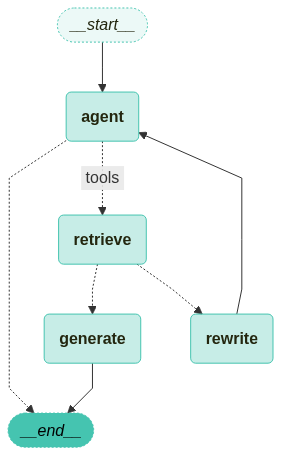

In [58]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(graph)


In [59]:
from langchain_teddynote.messages import stream_graph
from langchain_core.runnables import RunnableConfig

# config ÏÑ§Ï†ï(Ïû¨Í∑Ä ÏµúÎåÄ ÌöüÏàò, thread_id)
config = RunnableConfig(recursion_limit=10, configurable={"thread_id": "1"})

# ÏÇ¨Ïö©ÏûêÏùò ÏóêÏù¥Ï†ÑÌä∏ Î©îÎ™®Î¶¨ Ïú†ÌòïÏóê ÎåÄÌïú ÏßàÎ¨∏ÏùÑ Ìè¨Ìï®ÌïòÎäî ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ Ï†ïÏùò
inputs = {
    "messages": [
        ("user", "ÏÇºÏÑ±Ï†ÑÏûêÍ∞Ä Í∞úÎ∞úÌïú ÏÉùÏÑ±Ìòï AI Ïùò Ïù¥Î¶ÑÏùÄ?"),
    ]
}

# Í∑∏ÎûòÌîÑ Ïã§Ìñâ
stream_graph(graph, inputs, config, ["agent", "rewrite", "generate"])



üîÑ Node: agent üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
==== [DECISION: DOCS RELEVANT] ====

üîÑ Node: generate üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
ÏÇºÏÑ±Ï†ÑÏûêÍ∞Ä Í∞úÎ∞úÌïú ÏÉùÏÑ±Ìòï AIÏùò Ïù¥Î¶ÑÏùÄ 'ÏÇºÏÑ± Í∞ÄÏö∞Ïä§'ÏûÖÎãàÎã§.

**Source**
- data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf (page 12)

In [60]:
# Î¨∏ÏÑú Í≤ÄÏÉâÏù¥ Î∂àÍ∞ÄÎä•Ìïú ÏßàÎ¨∏ ÏòàÏãú
inputs = {
    "messages": [
        ("user", "ÎåÄÌïúÎØºÍµ≠Ïùò ÏàòÎèÑÎäî?"),
    ]
}

# Í∑∏ÎûòÌîÑ Ïã§Ìñâ
stream_graph(graph, inputs, config, ["agent", "rewrite", "generate"])



üîÑ Node: agent üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
ÎåÄÌïúÎØºÍµ≠Ïùò ÏàòÎèÑÎäî ÏÑúÏö∏ÌäπÎ≥ÑÏãúÏûÖÎãàÎã§.

In [61]:
from langgraph.errors import GraphRecursionError

# Î¨∏ÏÑú Í≤ÄÏÉâÏù¥ Î∂àÍ∞ÄÎä•Ìïú ÏßàÎ¨∏ ÏòàÏãú
inputs = {
    "messages": [
        ("user", "ÌÖåÎîîÎÖ∏Ìä∏Ïùò LangChain ÌäúÌÜ†Î¶¨Ïñº Ï£ºÏÜåÎäî?"),
    ]
}

try:
    # Í∑∏ÎûòÌîÑ Ïã§Ìñâ
    stream_graph(graph, inputs, config, ["agent", "rewrite", "generate"])
except GraphRecursionError as recursion_error:
    print(f"GraphRecursionError: {recursion_error}")



üîÑ Node: agent üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
ÌÖåÎîîÎÖ∏Ìä∏Ïùò LangChain ÌäúÌÜ†Î¶¨Ïñº Ï£ºÏÜåÎäî [Ïó¨Í∏∞](https://teddynote.me/categories/langchain/)ÏóêÏÑú ÌôïÏù∏ÌïòÏã§ Ïàò ÏûàÏäµÎãàÎã§.

07. Adaptive RAG

In [62]:
from rag.pdf import PDFRetrievalChain

# PDF Î¨∏ÏÑúÎ•º Î°úÎìúÌï©ÎãàÎã§.
pdf = PDFRetrievalChain(["data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf"]).create_chain()

# retriever ÏÉùÏÑ±
pdf_retriever = pdf.retriever

# chain ÏÉùÏÑ±
pdf_chain = pdf.chain


In [63]:
from typing import Literal

from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field
from langchain_openai import ChatOpenAI
from langchain_teddynote.models import get_model_name, LLMs

# ÏµúÏã† LLM Î™®Îç∏ Ïù¥Î¶Ñ Í∞ÄÏ†∏Ïò§Í∏∞
MODEL_NAME = get_model_name(LLMs.GPT4)


# ÏÇ¨Ïö©Ïûê ÏøºÎ¶¨Î•º Í∞ÄÏû• Í¥ÄÎ†®ÏÑ± ÎÜíÏùÄ Îç∞Ïù¥ÌÑ∞ ÏÜåÏä§Î°ú ÎùºÏö∞ÌåÖÌïòÎäî Îç∞Ïù¥ÌÑ∞ Î™®Îç∏
class RouteQuery(BaseModel):
    """Route a user query to the most relevant datasource."""

    # Îç∞Ïù¥ÌÑ∞ ÏÜåÏä§ ÏÑ†ÌÉùÏùÑ ÏúÑÌïú Î¶¨ÌÑ∞Îü¥ ÌÉÄÏûÖ ÌïÑÎìú
    datasource: Literal["vectorstore", "web_search"] = Field(
        ...,
        description="Given a user question choose to route it to web search or a vectorstore.",
    )


# LLM Ï¥àÍ∏∞Ìôî Î∞è Ìï®Ïàò Ìò∏Ï∂úÏùÑ ÌÜµÌïú Íµ¨Ï°∞ÌôîÎêú Ï∂úÎ†• ÏÉùÏÑ±
llm = ChatOpenAI(model=MODEL_NAME, temperature=0)
structured_llm_router = llm.with_structured_output(RouteQuery)

# ÏãúÏä§ÌÖú Î©îÏãúÏßÄÏôÄ ÏÇ¨Ïö©Ïûê ÏßàÎ¨∏ÏùÑ Ìè¨Ìï®Ìïú ÌîÑÎ°¨ÌîÑÌä∏ ÌÖúÌîåÎ¶ø ÏÉùÏÑ±
system = """You are an expert at routing a user question to a vectorstore or web search.
The vectorstore contains documents related to DEC 2023 AI Brief Report(SPRI) with Samsung Gause, Anthropic, etc.
Use the vectorstore for questions on these topics. Otherwise, use web-search."""

# Routing ÏùÑ ÏúÑÌïú ÌîÑÎ°¨ÌîÑÌä∏ ÌÖúÌîåÎ¶ø ÏÉùÏÑ±
route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "{question}"),
    ]
)

# ÌîÑÎ°¨ÌîÑÌä∏ ÌÖúÌîåÎ¶øÍ≥º Íµ¨Ï°∞ÌôîÎêú LLM ÎùºÏö∞ÌÑ∞Î•º Í≤∞Ìï©ÌïòÏó¨ ÏßàÎ¨∏ ÎùºÏö∞ÌÑ∞ ÏÉùÏÑ±
question_router = route_prompt | structured_llm_router


In [64]:
# Î¨∏ÏÑú Í≤ÄÏÉâÏù¥ ÌïÑÏöîÌïú ÏßàÎ¨∏
print(
    question_router.invoke(
        {"question": "AI Brief ÏóêÏÑú ÏÇºÏÑ±Ï†ÑÏûêÍ∞Ä ÎßåÎì† ÏÉùÏÑ±Ìòï AI Ïùò Ïù¥Î¶ÑÏùÄ?"}
    )
)


datasource='vectorstore'


In [65]:
# Ïõπ Í≤ÄÏÉâÏù¥ ÌïÑÏöîÌïú ÏßàÎ¨∏
print(question_router.invoke({"question": "ÌåêÍµêÏóêÏÑú Í∞ÄÏû• ÎßõÏûàÎäî Îî§ÏÑ¨Ïßë Ï∞æÏïÑÏ§ò"}))


datasource='web_search'


In [66]:
from pydantic import BaseModel, Field
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate


# Î¨∏ÏÑú ÌèâÍ∞ÄÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ Ï†ïÏùò
class GradeDocuments(BaseModel):
    """Binary score for relevance check on retrieved documents."""

    binary_score: str = Field(
        description="Documents are relevant to the question, 'yes' or 'no'"
    )


# LLM Ï¥àÍ∏∞Ìôî Î∞è Ìï®Ïàò Ìò∏Ï∂úÏùÑ ÌÜµÌïú Íµ¨Ï°∞ÌôîÎêú Ï∂úÎ†• ÏÉùÏÑ±
llm = ChatOpenAI(model=MODEL_NAME, temperature=0)
structured_llm_grader = llm.with_structured_output(GradeDocuments)

# ÏãúÏä§ÌÖú Î©îÏãúÏßÄÏôÄ ÏÇ¨Ïö©Ïûê ÏßàÎ¨∏ÏùÑ Ìè¨Ìï®Ìïú ÌîÑÎ°¨ÌîÑÌä∏ ÌÖúÌîåÎ¶ø ÏÉùÏÑ±
system = """You are a grader assessing relevance of a retrieved document to a user question. \n 
    If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
    It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
    Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."""

grade_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Retrieved document: \n\n {document} \n\n User question: {question}"),
    ]
)

# Î¨∏ÏÑú Í≤ÄÏÉâÍ≤∞Í≥º ÌèâÍ∞ÄÍ∏∞ ÏÉùÏÑ±
retrieval_grader = grade_prompt | structured_llm_grader


In [67]:
# ÏÇ¨Ïö©Ïûê ÏßàÎ¨∏ ÏÑ§Ï†ï
question = "ÏÇºÏÑ±Ï†ÑÏûêÍ∞Ä ÎßåÎì† ÏÉùÏÑ±Ìòï AI Ïùò Ïù¥Î¶ÑÏùÄ?"

# ÏßàÎ¨∏Ïóê ÎåÄÌïú Í¥ÄÎ†® Î¨∏ÏÑú Í≤ÄÏÉâ
docs = pdf_retriever.invoke(question)

# Í≤ÄÏÉâÎêú Î¨∏ÏÑúÏùò ÎÇ¥Ïö© Í∞ÄÏ†∏Ïò§Í∏∞
retrieved_doc = docs[1].page_content

# ÌèâÍ∞Ä Í≤∞Í≥º Ï∂úÎ†•
print(retrieval_grader.invoke({"question": question, "document": retrieved_doc}))


binary_score='yes'


In [68]:
from langchain import hub
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

# LangChain HubÏóêÏÑú ÌîÑÎ°¨ÌîÑÌä∏ Í∞ÄÏ†∏Ïò§Í∏∞(RAG ÌîÑÎ°¨ÌîÑÌä∏Îäî ÏûêÏú†Î°≠Í≤å ÏàòÏ†ï Í∞ÄÎä•)
prompt = hub.pull("teddynote/rag-prompt")

# LLM Ï¥àÍ∏∞Ìôî
llm = ChatOpenAI(model_name=MODEL_NAME, temperature=0)


# Î¨∏ÏÑú Ìè¨Îß∑ÌåÖ Ìï®Ïàò
def format_docs(docs):
    return "\n\n".join(
        [
            f'<document><content>{doc.page_content}</content><source>{doc.metadata["source"]}</source><page>{doc.metadata["page"]+1}</page></document>'
            for doc in docs
        ]
    )


# RAG Ï≤¥Ïù∏ ÏÉùÏÑ±
rag_chain = prompt | llm | StrOutputParser()


In [69]:
# RAG Ï≤¥Ïù∏Ïóê ÏßàÎ¨∏ÏùÑ Ï†ÑÎã¨ÌïòÏó¨ ÎãµÎ≥Ä ÏÉùÏÑ±
generation = rag_chain.invoke({"context": format_docs(docs), "question": question})
print(generation)


ÏÇºÏÑ±Ï†ÑÏûêÍ∞Ä ÎßåÎì† ÏÉùÏÑ±Ìòï AIÏùò Ïù¥Î¶ÑÏùÄ 'ÏÇºÏÑ± Í∞ÄÏö∞Ïä§'ÏûÖÎãàÎã§.

**Source**
- data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf (ÌéòÏù¥ÏßÄ 13)


In [70]:
# Ìï†Î£®ÏãúÎÑ§Ïù¥ÏÖò Ï≤¥ÌÅ¨Î•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î™®Îç∏ Ï†ïÏùò
class GradeHallucinations(BaseModel):
    """Binary score for hallucination present in generation answer."""

    binary_score: str = Field(
        description="Answer is grounded in the facts, 'yes' or 'no'"
    )


# Ìï®Ïàò Ìò∏Ï∂úÏùÑ ÌÜµÌïú LLM Ï¥àÍ∏∞Ìôî
llm = ChatOpenAI(model=MODEL_NAME, temperature=0)
structured_llm_grader = llm.with_structured_output(GradeHallucinations)

# ÌîÑÎ°¨ÌîÑÌä∏ ÏÑ§Ï†ï
system = """You are a grader assessing whether an LLM generation is grounded in / supported by a set of retrieved facts. \n 
    Give a binary score 'yes' or 'no'. 'Yes' means that the answer is grounded in / supported by the set of facts."""

# ÌîÑÎ°¨ÌîÑÌä∏ ÌÖúÌîåÎ¶ø ÏÉùÏÑ±
hallucination_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Set of facts: \n\n {documents} \n\n LLM generation: {generation}"),
    ]
)

# ÌôòÍ∞Å ÌèâÍ∞ÄÍ∏∞ ÏÉùÏÑ±
hallucination_grader = hallucination_prompt | structured_llm_grader


In [71]:
# ÌèâÍ∞ÄÍ∏∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏÉùÏÑ±Îêú ÎãµÎ≥ÄÏùò ÌôòÍ∞Å Ïó¨Î∂Ä ÌèâÍ∞Ä
hallucination_grader.invoke({"documents": docs, "generation": generation})


GradeHallucinations(binary_score='yes')

In [72]:
class GradeAnswer(BaseModel):
    """Binary scoring to evaluate the appropriateness of answers to questions"""

    binary_score: str = Field(
        description="Indicate 'yes' or 'no' whether the answer solves the question"
    )


# Ìï®Ïàò Ìò∏Ï∂úÏùÑ ÌÜµÌïú LLM Ï¥àÍ∏∞Ìôî
llm = ChatOpenAI(model=MODEL_NAME, temperature=0)
structured_llm_grader = llm.with_structured_output(GradeAnswer)

# ÌîÑÎ°¨ÌîÑÌä∏ ÏÑ§Ï†ï
system = """You are a grader assessing whether an answer addresses / resolves a question \n 
     Give a binary score 'yes' or 'no'. Yes' means that the answer resolves the question."""
answer_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "User question: \n\n {question} \n\n LLM generation: {generation}"),
    ]
)

# ÌîÑÎ°¨ÌîÑÌä∏ ÌÖúÌîåÎ¶øÍ≥º Íµ¨Ï°∞ÌôîÎêú LLM ÌèâÍ∞ÄÍ∏∞Î•º Í≤∞Ìï©ÌïòÏó¨ ÎãµÎ≥Ä ÌèâÍ∞ÄÍ∏∞ ÏÉùÏÑ±
answer_grader = answer_prompt | structured_llm_grader


In [73]:
# ÌèâÍ∞ÄÍ∏∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏÉùÏÑ±Îêú ÎãµÎ≥ÄÏù¥ ÏßàÎ¨∏ÏùÑ Ìï¥Í≤∞ÌïòÎäîÏßÄ Ïó¨Î∂Ä ÌèâÍ∞Ä
answer_grader.invoke({"question": question, "generation": generation})


GradeAnswer(binary_score='yes')

In [74]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# LLM Ï¥àÍ∏∞Ìôî
llm = ChatOpenAI(model=MODEL_NAME, temperature=0)

# Query Rewriter ÌîÑÎ°¨ÌîÑÌä∏ Ï†ïÏùò(ÏûêÏú†Î°≠Í≤å ÏàòÏ†ïÏù¥ Í∞ÄÎä•Ìï©ÎãàÎã§)
system = """You a question re-writer that converts an input question to a better version that is optimized \n 
for vectorstore retrieval. Look at the input and try to reason about the underlying semantic intent / meaning."""

# Query Rewriter ÌîÑÎ°¨ÌîÑÌä∏ ÌÖúÌîåÎ¶ø ÏÉùÏÑ±
re_write_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        (
            "human",
            "Here is the initial question: \n\n {question} \n Formulate an improved question.",
        ),
    ]
)

# Query Rewriter ÏÉùÏÑ±
question_rewriter = re_write_prompt | llm | StrOutputParser()


In [75]:
# ÏßàÎ¨∏ Ïû¨ÏûëÏÑ±Í∏∞Ïóê ÏßàÎ¨∏ÏùÑ Ï†ÑÎã¨ÌïòÏó¨ Í∞úÏÑ†Îêú ÏßàÎ¨∏ ÏÉùÏÑ±
question_rewriter.invoke({"question": question})


'ÏÇºÏÑ±Ï†ÑÏûêÍ∞Ä Í∞úÎ∞úÌïú ÏÉùÏÑ±Ìòï Ïù∏Í≥µÏßÄÎä•Ïùò Ïù¥Î¶ÑÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?'

In [76]:
from langchain_teddynote.tools.tavily import TavilySearch

# Ïõπ Í≤ÄÏÉâ ÎèÑÍµ¨ ÏÉùÏÑ±
web_search_tool = TavilySearch(max_results=3)


In [77]:
# Ïõπ Í≤ÄÏÉâ ÎèÑÍµ¨ Ìò∏Ï∂ú
result = web_search_tool.search("ÌÖåÎîîÎÖ∏Ìä∏ ÏúÑÌÇ§ÎèÖÏä§ Îû≠Ï≤¥Ïù∏ ÌäúÌÜ†Î¶¨Ïñº URL ÏùÑ ÏïåÎ†§Ï£ºÏÑ∏Ïöî")
print(result)


[{'url': 'https://www.youtube.com/watch?v=mVu6Wj8Z7C0', 'title': 'Îû≠Ï≤¥Ïù∏ ÌïúÍµ≠Ïñ¥ ÌäúÌÜ†Î¶¨Ïñº     ÏóÖÎç∞Ïù¥Ìä∏ ÏÜåÏãù   Ï≤òÏùå ÏÇ¨Ïö©ÏûêÎ•º ÏúÑÌïú ÏπúÏ†àÌïú ...', 'content': '#Îû≠Ï≤¥Ïù∏ ÌïúÍµ≠Ïñ¥ ÌäúÌÜ†Î¶¨Ïñºüá∞üá∑ ÏóÖÎç∞Ïù¥Ìä∏ ÏÜåÏãùüî• Ï≤òÏùå ÏÇ¨Ïö©ÏûêÎ•º ÏúÑÌïú ÏπúÏ†àÌïú ÌôòÍ≤ΩÏÑ§Ïπò(Windows, Mac)\n\nÌÖåÎîîÎÖ∏Ìä∏ TeddyNote\n317 likes\n16451 views\n19 Jun 2024\nüìù ÌôòÍ≤ΩÏÑ§Ï†ï(Windows)\nhttps://teddynote.com/10-RAG%EB%B9%84%EB%B2%95%EB%85%B8%ED%8A%B8/%ED%99%98%EA%B2%BD%20%EC%84%A4%EC%A0%95%20(Windows)/\n\nüìù ÌôòÍ≤ΩÏÑ§Ï†ï(Mac)\nhttps://teddynote.com/10-RAG%EB%B9%84%EB%B2%95%EB%85%B8%ED%8A%B8/%ED%99%98%EA%B2%BD%20%EC%84%A4%EC%A0%95%20(Mac)/\n\nüìç[Ìå®Ïä§Ìä∏Ï∫†ÌçºÏä§] "ÌÖåÎîîÎÖ∏Ìä∏Ïùò RAG ÎπÑÎ≤ïÎÖ∏Ìä∏" Í∞ïÏùò\nÎßÅÌÅ¨: https://bit.ly/4e1h8zO\n\nü§ñ ÎîîÏä§ÏΩîÎìú Ï±ÑÎÑê\nhttps://discord.gg/q3RvQZ5CfK\n\nüìò Îû≠Ï≤¥Ïù∏ ÌäúÌÜ†Î¶¨Ïñº Î¨¥Î£å Ï†ÑÏûêÏ±Ö(wikidocs)\nhttps://wikidocs.net/book/14314\n\n‚úÖ Îû≠Ï≤¥Ïù∏ ÌïúÍµ≠Ïñ¥ ÌäúÌÜ†Î¶¨Ïñº ÏΩîÎìúÏ†ÄÏû•ÏÜå(GitHub)\nhttps://github.com/ted

In [78]:
from typing import List
from typing_extensions import TypedDict, Annotated


# Í∑∏ÎûòÌîÑÏùò ÏÉÅÌÉú Ï†ïÏùò
class GraphState(TypedDict):
    """
    Í∑∏ÎûòÌîÑÏùò ÏÉÅÌÉúÎ•º ÎÇòÌÉÄÎÇ¥Îäî Îç∞Ïù¥ÌÑ∞ Î™®Îç∏

    Attributes:
        question: ÏßàÎ¨∏
        generation: LLM ÏÉùÏÑ±Îêú ÎãµÎ≥Ä
        documents: ÎèÑÌÅêÎ®ºÌãë Î¶¨Ïä§Ìä∏
    """

    question: Annotated[str, "User question"]
    generation: Annotated[str, "LLM generated answer"]
    documents: Annotated[List[str], "List of documents"]


In [79]:
from langchain_core.documents import Document


# Î¨∏ÏÑú Í≤ÄÏÉâ ÎÖ∏Îìú
def retrieve(state):
    print("==== [RETRIEVE] ====")
    question = state["question"]

    # Î¨∏ÏÑú Í≤ÄÏÉâ ÏàòÌñâ
    documents = pdf_retriever.invoke(question)
    return {"documents": documents, "question": question}


# ÎãµÎ≥Ä ÏÉùÏÑ± ÎÖ∏Îìú
def generate(state):
    print("==== [GENERATE] ====")
    # ÏßàÎ¨∏Í≥º Î¨∏ÏÑú Í≤ÄÏÉâ Í≤∞Í≥º Í∞ÄÏ†∏Ïò§Í∏∞
    question = state["question"]
    documents = state["documents"]

    # RAG ÎãµÎ≥Ä ÏÉùÏÑ±
    generation = rag_chain.invoke({"context": documents, "question": question})
    return {"documents": documents, "question": question, "generation": generation}


# Î¨∏ÏÑú Í¥ÄÎ†®ÏÑ± ÌèâÍ∞Ä ÎÖ∏Îìú
def grade_documents(state):
    print("==== [CHECK DOCUMENT RELEVANCE TO QUESTION] ====")
    # ÏßàÎ¨∏Í≥º Î¨∏ÏÑú Í≤ÄÏÉâ Í≤∞Í≥º Í∞ÄÏ†∏Ïò§Í∏∞
    question = state["question"]
    documents = state["documents"]

    # Í∞Å Î¨∏ÏÑúÏóê ÎåÄÌïú Í¥ÄÎ†®ÏÑ± Ï†êÏàò Í≥ÑÏÇ∞
    filtered_docs = []
    for d in documents:
        score = retrieval_grader.invoke(
            {"question": question, "document": d.page_content}
        )
        grade = score.binary_score
        if grade == "yes":
            print("---GRADE: DOCUMENT RELEVANT---")
            # Í¥ÄÎ†®ÏÑ±Ïù¥ ÏûàÎäî Î¨∏ÏÑú Ï∂îÍ∞Ä
            filtered_docs.append(d)
        else:
            # Í¥ÄÎ†®ÏÑ±Ïù¥ ÏóÜÎäî Î¨∏ÏÑúÎäî Í±¥ÎÑàÎõ∞Í∏∞
            print("---GRADE: DOCUMENT NOT RELEVANT---")
            continue
    return {"documents": filtered_docs, "question": question}


# ÏßàÎ¨∏ Ïû¨ÏûëÏÑ± ÎÖ∏Îìú
def transform_query(state):
    print("==== [TRANSFORM QUERY] ====")
    # ÏßàÎ¨∏Í≥º Î¨∏ÏÑú Í≤ÄÏÉâ Í≤∞Í≥º Í∞ÄÏ†∏Ïò§Í∏∞
    question = state["question"]
    documents = state["documents"]

    # ÏßàÎ¨∏ Ïû¨ÏûëÏÑ±
    better_question = question_rewriter.invoke({"question": question})
    return {"documents": documents, "question": better_question}


# Ïõπ Í≤ÄÏÉâ ÎÖ∏Îìú
def web_search(state):
    print("==== [WEB SEARCH] ====")
    # ÏßàÎ¨∏Í≥º Î¨∏ÏÑú Í≤ÄÏÉâ Í≤∞Í≥º Í∞ÄÏ†∏Ïò§Í∏∞
    question = state["question"]

    # Ïõπ Í≤ÄÏÉâ ÏàòÌñâ
    web_results = web_search_tool.invoke({"query": question})
    web_results_docs = [
        Document(
            page_content=web_result["content"],
            metadata={"source": web_result["url"]},
        )
        for web_result in web_results
    ]

    return {"documents": web_results_docs, "question": question}


In [80]:
# ÏßàÎ¨∏ ÎùºÏö∞ÌåÖ ÎÖ∏Îìú
def route_question(state):
    print("==== [ROUTE QUESTION] ====")
    # ÏßàÎ¨∏ Í∞ÄÏ†∏Ïò§Í∏∞
    question = state["question"]
    # ÏßàÎ¨∏ ÎùºÏö∞ÌåÖ
    source = question_router.invoke({"question": question})
    # ÏßàÎ¨∏ ÎùºÏö∞ÌåÖ Í≤∞Í≥ºÏóê Îî∞Î•∏ ÎÖ∏Îìú ÎùºÏö∞ÌåÖ
    if source.datasource == "web_search":
        print("==== [ROUTE QUESTION TO WEB SEARCH] ====")
        return "web_search"
    elif source.datasource == "vectorstore":
        print("==== [ROUTE QUESTION TO VECTORSTORE] ====")
        return "vectorstore"


# Î¨∏ÏÑú Í¥ÄÎ†®ÏÑ± ÌèâÍ∞Ä ÎÖ∏Îìú
def decide_to_generate(state):
    print("==== [DECISION TO GENERATE] ====")
    # ÏßàÎ¨∏Í≥º Î¨∏ÏÑú Í≤ÄÏÉâ Í≤∞Í≥º Í∞ÄÏ†∏Ïò§Í∏∞
    question = state["question"]
    filtered_documents = state["documents"]

    if not filtered_documents:
        # Î™®Îì† Î¨∏ÏÑúÍ∞Ä Í¥ÄÎ†®ÏÑ± ÏóÜÎäî Í≤ΩÏö∞ ÏßàÎ¨∏ Ïû¨ÏûëÏÑ±
        print(
            "==== [DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY] ===="
        )
        return "transform_query"
    else:
        # Í¥ÄÎ†®ÏÑ± ÏûàÎäî Î¨∏ÏÑúÍ∞Ä ÏûàÎäî Í≤ΩÏö∞ ÎãµÎ≥Ä ÏÉùÏÑ±
        print("==== [DECISION: GENERATE] ====")
        return "generate"


def hallucination_check(state):
    print("==== [CHECK HALLUCINATIONS] ====")
    # ÏßàÎ¨∏Í≥º Î¨∏ÏÑú Í≤ÄÏÉâ Í≤∞Í≥º Í∞ÄÏ†∏Ïò§Í∏∞
    question = state["question"]
    documents = state["documents"]
    generation = state["generation"]

    # ÌôòÍ∞Å ÌèâÍ∞Ä
    score = hallucination_grader.invoke(
        {"documents": documents, "generation": generation}
    )
    grade = score.binary_score

    # Hallucination Ïó¨Î∂Ä ÌôïÏù∏
    if grade == "yes":
        print("==== [DECISION: GENERATION IS GROUNDED IN DOCUMENTS] ====")

        # ÎãµÎ≥ÄÏùò Í¥ÄÎ†®ÏÑ±(Relevance) ÌèâÍ∞Ä
        print("==== [GRADE GENERATED ANSWER vs QUESTION] ====")
        score = answer_grader.invoke({"question": question, "generation": generation})
        grade = score.binary_score

        # Í¥ÄÎ†®ÏÑ± ÌèâÍ∞Ä Í≤∞Í≥ºÏóê Îî∞Î•∏ Ï≤òÎ¶¨
        if grade == "yes":
            print("==== [DECISION: GENERATED ANSWER ADDRESSES QUESTION] ====")
            return "relevant"
        else:
            print("==== [DECISION: GENERATED ANSWER DOES NOT ADDRESS QUESTION] ====")
            return "not relevant"
    else:
        print("==== [DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS, RE-TRY] ====")
        return "hallucination"


In [81]:
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver

# Í∑∏ÎûòÌîÑ ÏÉÅÌÉú Ï¥àÍ∏∞Ìôî
workflow = StateGraph(GraphState)

# ÎÖ∏Îìú Ï†ïÏùò
workflow.add_node("web_search", web_search)  # Ïõπ Í≤ÄÏÉâ
workflow.add_node("retrieve", retrieve)  # Î¨∏ÏÑú Í≤ÄÏÉâ
workflow.add_node("grade_documents", grade_documents)  # Î¨∏ÏÑú ÌèâÍ∞Ä
workflow.add_node("generate", generate)  # ÎãµÎ≥Ä ÏÉùÏÑ±
workflow.add_node("transform_query", transform_query)  # ÏøºÎ¶¨ Î≥ÄÌôò

# Í∑∏ÎûòÌîÑ ÎπåÎìú
workflow.add_conditional_edges(
    START,
    route_question,
    {
        "web_search": "web_search",  # Ïõπ Í≤ÄÏÉâÏúºÎ°ú ÎùºÏö∞ÌåÖ
        "vectorstore": "retrieve",  # Î≤°ÌÑ∞Ïä§ÌÜ†Ïñ¥Î°ú ÎùºÏö∞ÌåÖ
    },
)
workflow.add_edge("web_search", "generate")  # Ïõπ Í≤ÄÏÉâ ÌõÑ ÎãµÎ≥Ä ÏÉùÏÑ±
workflow.add_edge("retrieve", "grade_documents")  # Î¨∏ÏÑú Í≤ÄÏÉâ ÌõÑ ÌèâÍ∞Ä
workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "transform_query": "transform_query",  # ÏøºÎ¶¨ Î≥ÄÌôò ÌïÑÏöî
        "generate": "generate",  # ÎãµÎ≥Ä ÏÉùÏÑ± Í∞ÄÎä•
    },
)
workflow.add_edge("transform_query", "retrieve")  # ÏøºÎ¶¨ Î≥ÄÌôò ÌõÑ Î¨∏ÏÑú Í≤ÄÏÉâ
workflow.add_conditional_edges(
    "generate",
    hallucination_check,
    {
        "hallucination": "generate",  # Hallucination Î∞úÏÉù Ïãú Ïû¨ÏÉùÏÑ±
        "relevant": END,  # ÎãµÎ≥ÄÏùò Í¥ÄÎ†®ÏÑ± Ïó¨Î∂Ä ÌÜµÍ≥º
        "not relevant": "transform_query",  # ÎãµÎ≥ÄÏùò Í¥ÄÎ†®ÏÑ± Ïó¨Î∂Ä ÌÜµÍ≥º Ïã§Ìå® Ïãú ÏøºÎ¶¨ Î≥ÄÌôò
    },
)

# Í∑∏ÎûòÌîÑ Ïª¥ÌååÏùº
app = workflow.compile(checkpointer=MemorySaver())


In [82]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(app)


In [83]:
from langchain_teddynote.messages import stream_graph
from langchain_core.runnables import RunnableConfig
import uuid

# config ÏÑ§Ï†ï(Ïû¨Í∑Ä ÏµúÎåÄ ÌöüÏàò, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": uuid.uuid4()})

# ÏßàÎ¨∏ ÏûÖÎ†•
inputs = {
    "question": "ÏÇºÏÑ±Ï†ÑÏûêÍ∞Ä Í∞úÎ∞úÌïú ÏÉùÏÑ±Ìòï AI Ïùò Ïù¥Î¶ÑÏùÄ?",
}

# Í∑∏ÎûòÌîÑ Ïã§Ìñâ
stream_graph(app, inputs, config, ["agent", "rewrite", "generate"])


==== [ROUTE QUESTION] ====
==== [ROUTE QUESTION TO VECTORSTORE] ====
==== [RETRIEVE] ====
==== [CHECK DOCUMENT RELEVANCE TO QUESTION] ====
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
==== [DECISION TO GENERATE] ====
==== [DECISION: GENERATE] ====
==== [GENERATE] ====

üîÑ Node: generate üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
ÏÇºÏÑ±Ï†ÑÏûêÍ∞Ä Í∞úÎ∞úÌïú ÏÉùÏÑ±Ìòï AIÏùò Ïù¥Î¶ÑÏùÄ 'ÏÇºÏÑ± Í∞ÄÏö∞Ïä§'ÏûÖÎãàÎã§.

**Source**
- data/SPRI_AI_Brief_2023ÎÖÑ12ÏõîÌò∏_F.pdf (page 12)==== [CHECK HALLUCINATIONS] ====
{"binary_score":"yes"}==== [DECISION: GENERATION IS GROUNDED IN DOCUMENTS] ====
==== [GRADE GENERATED ANSWER vs QUESTION] ====
{"binary_score":"yes"}==== [DECISION: GENERATED ANSWER ADDRESSES QUE

In [84]:
# ÏßàÎ¨∏ ÏûÖÎ†•
inputs = {
    "question": "2024ÎÖÑ ÎÖ∏Î≤® Î¨∏ÌïôÏÉÅ ÏàòÏÉÅÏûêÎäî ÎàÑÍµ¨Ïù∏Í∞ÄÏöî?",
}

# Í∑∏ÎûòÌîÑ Ïã§Ìñâ
stream_graph(app, inputs, config, ["agent", "rewrite", "generate"])


==== [ROUTE QUESTION] ====
==== [ROUTE QUESTION TO WEB SEARCH] ====
==== [WEB SEARCH] ====
==== [GENERATE] ====

üîÑ Node: generate üîÑ
- - - - - - - - - - - - - - - - - - - - - - - - - 
2024ÎÖÑ ÎÖ∏Î≤® Î¨∏ÌïôÏÉÅ ÏàòÏÉÅÏûêÎäî ÌïúÍµ≠ ÏÜåÏÑ§Í∞Ä ÌïúÍ∞ïÏûÖÎãàÎã§.

**Source**
- https://www.youtube.com/watch?v=CW2QkiLd_8I
- https://moonji.com/38049/
- https://blog.naver.com/hitecs/223616059397==== [CHECK HALLUCINATIONS] ====
{"binary_score":"yes"}==== [DECISION: GENERATION IS GROUNDED IN DOCUMENTS] ====
==== [GRADE GENERATED ANSWER vs QUESTION] ====
{"binary_score":"no"}==== [DECISION: GENERATED ANSWER DOES NOT ADDRESS QUESTION] ====
==== [TRANSFORM QUERY] ====
==== [RETRIEVE] ====
==== [CHECK DOCUMENT RELEVANCE TO QUESTION] ====
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT N

GraphRecursionError: Recursion limit of 20 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT